## Alphagoal Customer Subcription Model

### Business Understanding

#### Problem Statement
Current marketing strategies often involve reaching out to a large pool of clients without a clear understanding of their likelihood to subscribe. This approach results in wasted resources and low conversion rates. A predictive model can provide a data-driven solution to identify potential subscribers more effectively.

#### Objectives
- The primary business goal is to enhance the effectiveness of marketing campaigns for term deposits by predicting the likelihood of a client subscribing to one. By leveraging operational data, the organization aims to target the most promising clients, thereby improving campaign efficiency, reducing costs, and increasing subscription rates.
- The key objective is to create a machine learning model capable to predict whether a given customer will subscribe to a service or not based on his 
activitities.

#### Key Stakeholders

- Marketing  (End-Users of Product): Use insights from the model to design targeted marketing campaigns, optimize outreach efforts, and monitor campaign performance to increase subscription rates and ensure customer satisfaction.

- Sales Team: Leverage model predictions to prioritize leads and improve follow-up efficiency to enhance client engagement and close deals effectively.

- Data Science Team: Develop and maintain the predictive model. Collect, clean, and analyze data; build and validate the model; and provide actionable insights to ensure technical accuracy, scalability, and usability of the model.

- IT and Data Engineering Team: Support system integration and data pipelines. Provide infrastructure, ensure data availability, and integrate the model into existing systems to maintain smooth technical operations and scalability.

- Executive Management: Decision-makers and project sponsors. Define strategic objectives, allocate resources, and monitor project impact to align the project outcomes with business goals, such as cost reduction and revenue growth.

#### Success Metrics
- Business Success: Increase in term deposit subscriptions and reduced marketing costs.
- Analytical Success: A predictive model with high accuracy, precision, and recall (90% or more) to identify potential subscribers.
- Deployment Success: Integration of the predictive model into the marketing workflow to guide decision-making.

#### Hypothesis Statement
- **Null Hypothesis (Ho)**: The number of campaigns sent to a client does not significantly impact their likelihood of subscribing to a term deposit.
- **Altenate Hypothesis(Ha)**: The number of campaigns sent to a client significantly impacts their likelihood of subscribing to a term deposit.

#### Business Questions
1. How does the number of campaigns affect the likelihood of a client subscribing to a term deposit?
2. What client characteristics (e.g., age, job, marital status, education) are most strongly associated with subscribing to a term deposit?
3. Does the timing of the campaigns (e.g., contact day, month) influence subscription rates?
4. Is there a diminishing return on additional campaigns (i.e., after a certain point, additional campaigns do not increase subscription rates)?
5. How do past campaign outcomes (poutcome) affect the likelihood of subscription in future campaigns?

#### Source of Data 
There are four datasets:  
- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed. 
- bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs. 
- bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).  
- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).  
git
#### Data Dictionary


| **Variable Name** | **Description**                                                  | **Data Type** | **Possible Values**                                                                                              |
|--------------------|------------------------------------------------------------------|---------------|------------------------------------------------------------------------------------------------------------------|
| **age**            | Age of the client                                               | Numeric       | Any positive integer (e.g., 18, 35, etc.)                                                                        |
| **job**            | Type of job                                                     | Categorical   | "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services" |
| **marital**        | Marital status of the client                                    | Categorical   | "married", "divorced", "single"                                                                                  |
| **education**      | Level of education                                              | Categorical   | "unknown", "secondary", "primary", "tertiary"                                                                    |
| **default**        | Has credit in default?                                          | Binary        | "yes", "no"                                                                                                      |
| **balance**        | Average yearly balance of the client (in euros)                 | Numeric       | Any real number (e.g., -500, 0, 1500)                                                                            |
| **housing**        | Does the client have a housing loan?                            | Binary        | "yes", "no"                                                                                                      |
| **loan**           | Does the client have a personal loan?                           | Binary        | "yes", "no"                                                                                                      |
| **contact**        | Contact communication type used                                 | Categorical   | "unknown", "telephone", "cellular"                                                                               |
| **day**            | Last contact day of the month                                   | Numeric       | 1–31                                                                                                             |
| **month**          | Last contact month of the year                                  | Categorical   | "jan", "feb", "mar", ..., "nov", "dec"                                                                           |
| **duration**       | Duration of the last contact, in seconds                        | Numeric       | Any non-negative integer (e.g., 0, 120, 300)                                                                     |
| **campaign**       | Number of contacts performed during this campaign               | Numeric       | Any positive integer (e.g., 1, 2, 10)                                                                            |
| **pdays**          | Number of days since the client was last contacted in a previous campaign | Numeric       | -1 (not previously contacted), or any positive integer (e.g., 5, 30, etc.)                                       |
| **previous**       | Number of contacts performed before this campaign               | Numeric       | Any non-negative integer (e.g., 0, 1, 5)                                                                         |
| **poutcome**       | Outcome of the previous marketing campaign                      | Categorical   | "unknown", "other", "failure", "success"                                                                         |
| **y**              | Target variable: has the client subscribed to a term deposit?   | Binary        | "yes", "no"                                                                                                      |



#### Importations

In [1]:
# Import necessary libraries

import os
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from phik.report import plot_correlation_matrix
from optuna import visualization as ov
import plotly.express as px

# Data Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif

# Model Evaluation Libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import f1_score as optuna_f1_score

# Feature Selection Libraries

from sklearn.feature_selection import RFE, SelectKBest, chi2

# Model Persistence Libraries
import joblib

# Hyperparameter Tuning Libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import optuna
# Stats Library
from scipy.stats import chi2_contingency

# utility libraries 
import warnings
warnings.filterwarnings(action='ignore')

# Define custom color palette
custom_palette = {"yes": "#1f77b4", "no": "#ff7f0e"}  # Hex codes for custom colors


c:\Users\Alphagoal\anaconda3\envs\cust_sub\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Data Understanding

##### Data Loading

In [2]:

train_df = pd.read_csv("../data/bank-full.csv",delimiter=";")
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### Exploratory Data Analysis

In [3]:
# check shape of dataset
train_df.shape

(45211, 17)

In [4]:
# Check for columns in the dataset
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
# inspect the first five rows
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# inspect the last five rows
train_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
# Perform Descriptive Analysis
train_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.94,10.62,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.27,3044.77,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.81,8.32,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.16,257.53,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.76,3.10,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.20,100.13,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.58,2.30,0.0,0.0,0.0,0.0,275.0


In [8]:
# info about dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
# check for null values
train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
# check for duplicates
train_df.duplicated().sum()

np.int64(0)

In [11]:
# check the number of unique values in the dataset
train_df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [12]:
# Define a function to print unique values for categorical columns
def print_unique_categorical(df):
    """
    Print unique values for each categorical column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    """
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column is of type 'object' (categorical)
            underline = '~' * len(f"Column: {column}")
            print(f"Column: {column}")
            print(underline)
            unique_values = df[column].unique()
            print(f"Unique Values: {unique_values}\n")

In [13]:
# use function to check unique values
print_unique_categorical(train_df)

Column: job
~~~~~~~~~~~
Unique Values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
~~~~~~~~~~~~~~~
Unique Values: ['married' 'single' 'divorced']

Column: education
~~~~~~~~~~~~~~~~~
Unique Values: ['tertiary' 'secondary' 'unknown' 'primary']

Column: default
~~~~~~~~~~~~~~~
Unique Values: ['no' 'yes']

Column: housing
~~~~~~~~~~~~~~~
Unique Values: ['yes' 'no']

Column: loan
~~~~~~~~~~~~
Unique Values: ['no' 'yes']

Column: contact
~~~~~~~~~~~~~~~
Unique Values: ['unknown' 'cellular' 'telephone']

Column: month
~~~~~~~~~~~~~
Unique Values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
~~~~~~~~~~~~~~~~
Unique Values: ['unknown' 'failure' 'other' 'success']

Column: y
~~~~~~~~~
Unique Values: ['no' 'yes']



##### Key Insights
The dataset comprises 45211 rows and 17 columns. It includes a variety of demographic and customer account features, along with the target variable **"y" (yes or no)**, which indicates whether a customer subscribed to a term deposit. There are no null values as well as no duplicates both in the training and testing dataset.

**1. Data Types and Columns:**

The dataset consists of 17 columns:
- 7 columns int64 data type
- 10 columns of object data type
*No column contains any Null value*

**2. Feature Overview:**

The dataset includes various demographic and customer bank-account details features.
The target variable, **y(yes or no)** , indicates whether a customer subscribed to a term-deposit or not. exceeds a specific threshold and is categorized as an object data type.
- The 'duration' column seems to have a high variance and might not contribute much to the model.
- The 'pdays' and 'previous' columns have a lot of -1 values which indicates that these clients were not contacted in the previous campaigns.
- The average age of the customers is 41 years, which suggest a youthful group of customers
- The average age is 41 and the std is 10.61 suggest the age dustribution is- not normal with potential outliers which will be looked at.
- Majority of the customers work in blue-colour jobs
- Most of the customers are secondary school leavers which might affect their income levels and might cause a significant effect on the discount subscription
- The average balance of a customer is $1362,and with an std $3044 suggest a significant outlier.  
- With a minimum balance of -$8019.0 and the max being $102127
- On the average, 3 campaigns are sent to one indiviual with a min of 1 and max of 63.
- With mean campaign of about 2.763841 and std of 3.098021
- On the average, 40days passes before the banks contact customers.

**3. Data Distribution**
The distribution of the bank-data shows that the entire dataset is not normaly distributed. The individual columns are heavily skewed.


**4. Potential Data Imbalance:**

While the distribution of the target variable y is not detailed. There is a huge data imbalance which will be looked at and resolved during the data preparation stage

**5. Considerations for Feature Engineering:**

**Summary**: The dataset does not contain any null values but there is a lot of outliers in the numeric columns which will be considered in how the data will be prepared for model training.The target variable **y** seems well-represented but warrants checking for class distribution. Effective feature engineering is crucial, particularly for handling high-cardinality features.


##### Univariate Analysis

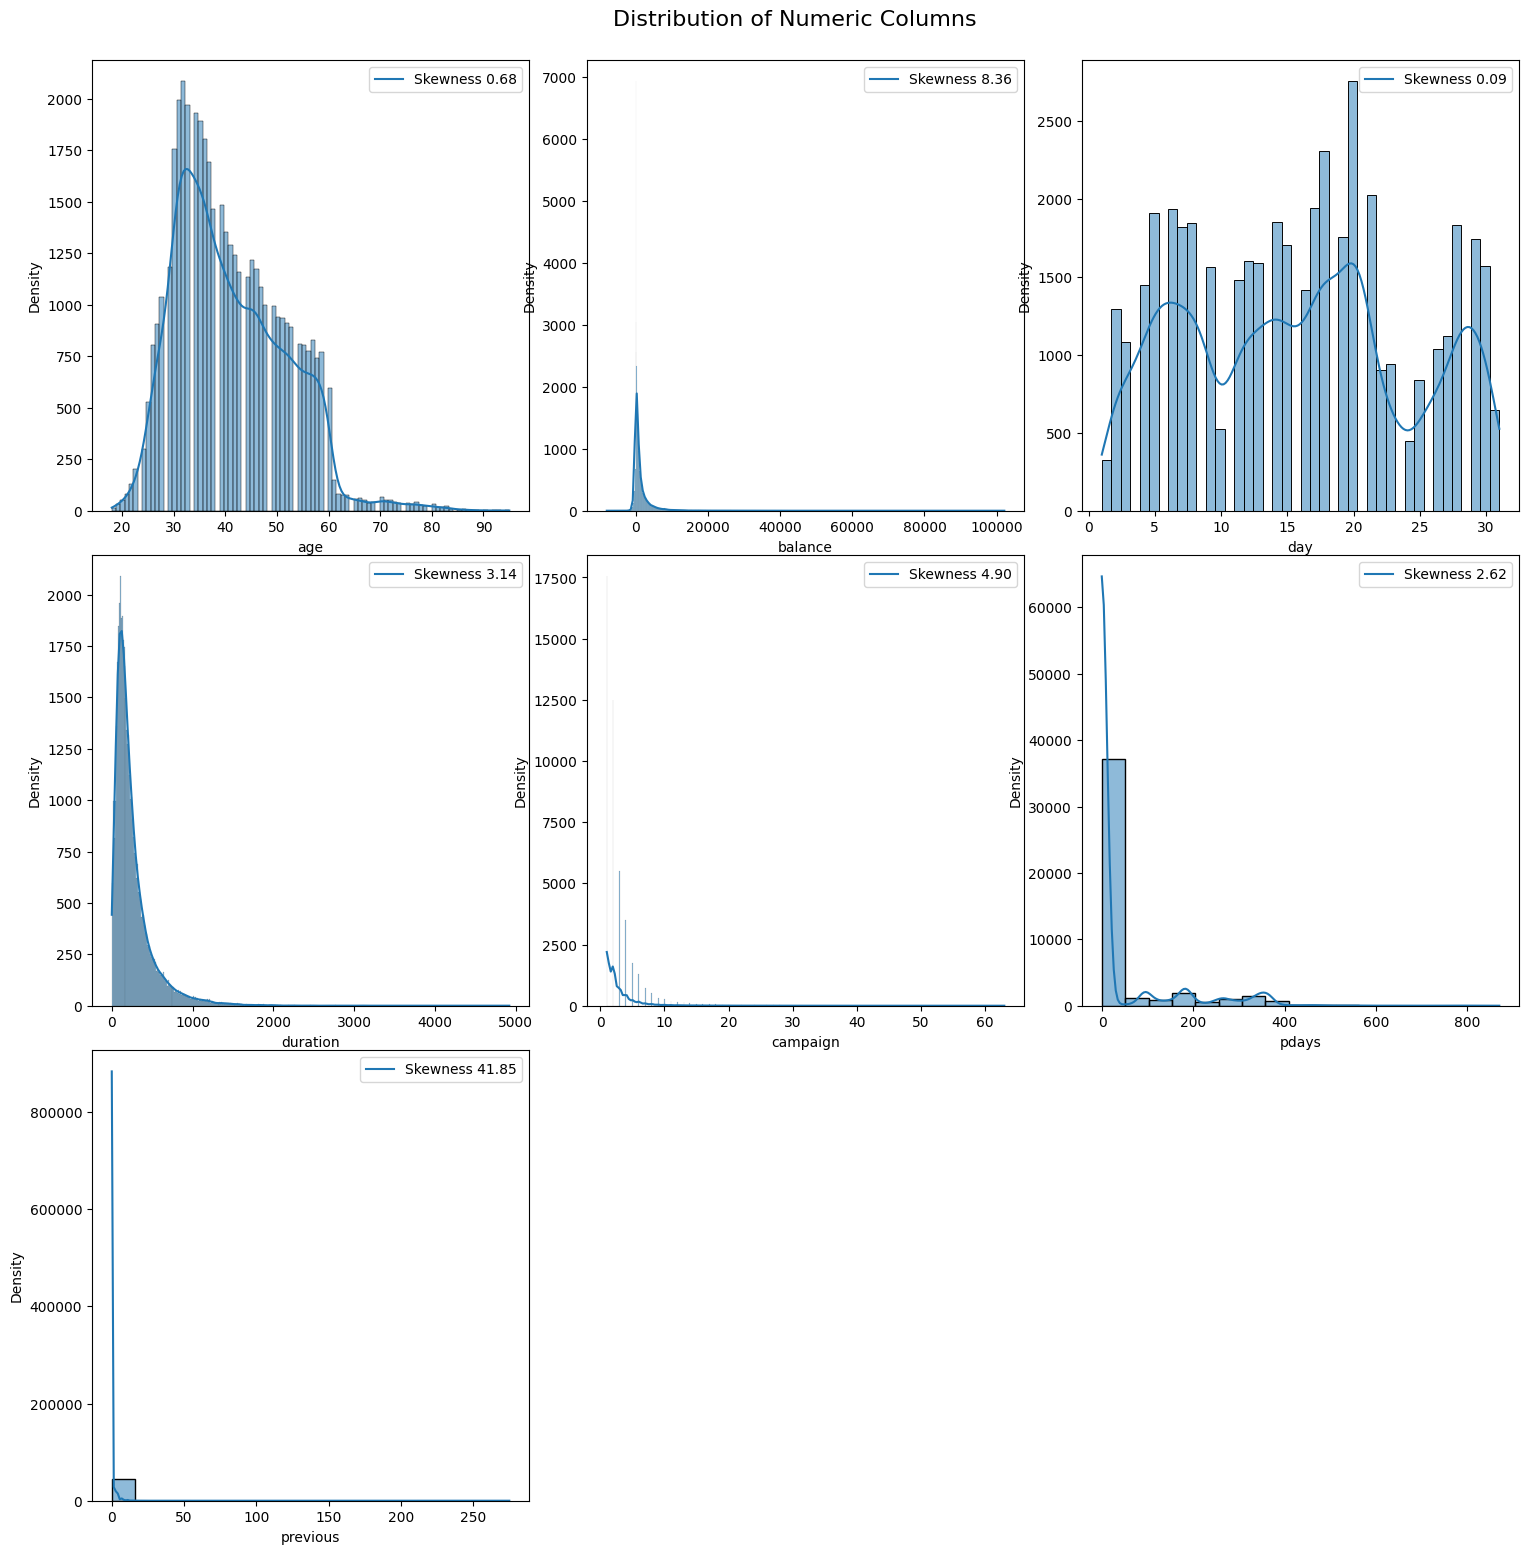

In [14]:
# set the number of rows and columns for subplot

# Get numeric columns
numeric_columns =train_df.select_dtypes(include=['int64','float64']).columns
num_columns = len(numeric_columns)

# Divide the columns into rows and columns
num_rows = num_columns // 3 + int(num_columns % 3 != 0)
num_cols = min(3, num_columns)

# Create subplot for each numeric column
fig, axes = plt.subplots(num_rows, num_cols, figsize = (15,15))
fig.tight_layout()

# Set single title for all subplots
fig.suptitle("Distribution of Numeric Columns", fontsize = 16, y = 1.02)

# flatten axes
axes = axes.flatten()
for id, column in enumerate(numeric_columns):
        sns.histplot(train_df[column], ax=axes[id], kde=True)
        skewness = train_df[column].skew()
        axes[id].legend([f'Skewness {skewness:.2f}'])
        axes[id].set_ylabel('Density')

# Hide unused subplots if any
for ax in axes[num_columns:]:
      ax.set_visible(False)

plt.show()

The distribution of the bank-data shows that the entire dataset is not normaly distributed. The individual data is heavily skewed towards the right(positively skewed)
This will inform how data should be prepared.


##### Outlier Detection Using Box Plots


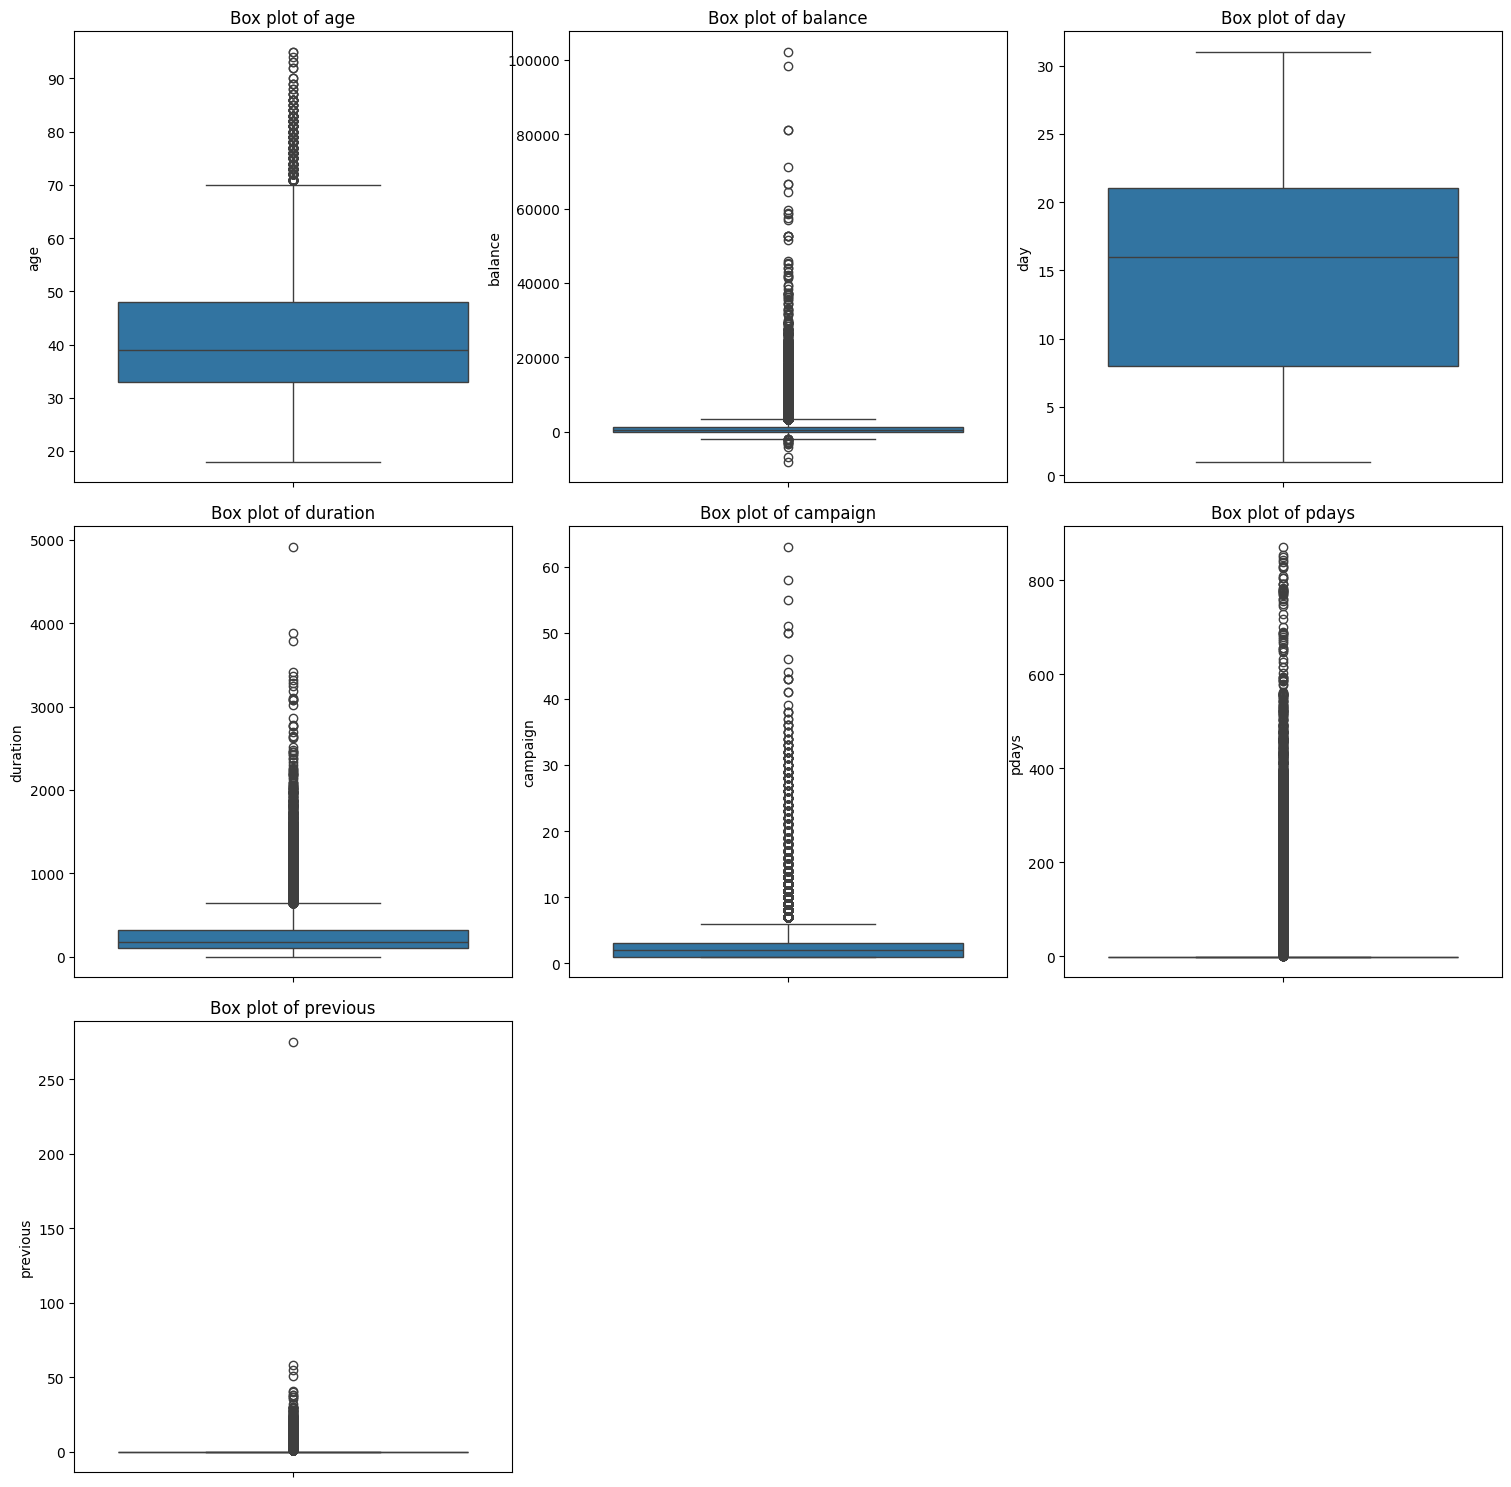

In [15]:
# set the number of rows and columns for subplot

# Get numeric columns
numeric_columns =train_df.select_dtypes(include=['int64','float64']).columns
num_columns = len(numeric_columns)

# Divide the columns into rows and columns
num_rows = num_columns // 3 + int(num_columns % 3 != 0)
num_cols = min(3, num_columns)

# Create subplot for each numeric column
fig, axes = plt.subplots(num_rows, num_cols, figsize = (15,15))
fig.tight_layout()


# flatten axes
axes = axes.flatten()
for id, column in enumerate(numeric_columns):
        sns.boxplot(train_df[column], ax=axes[id])
        axes[id].set_title(f'Box plot of {column}')
# Hide unused subplots if any
for ax in axes[num_columns:]:
      ax.set_visible(False)

plt.show()

The box plot visualizations depicts the presence of outliers in the data.

- The outliers will be looked at and dealt with appropriately based on stakeholders advice and the project objectives.
- The numerical columns will be scaled using various scaling methods to ensure that the data is kept in the same range.
- Log transformations will be applied too in the data preparation stage.

##### Marital-Status Distribution


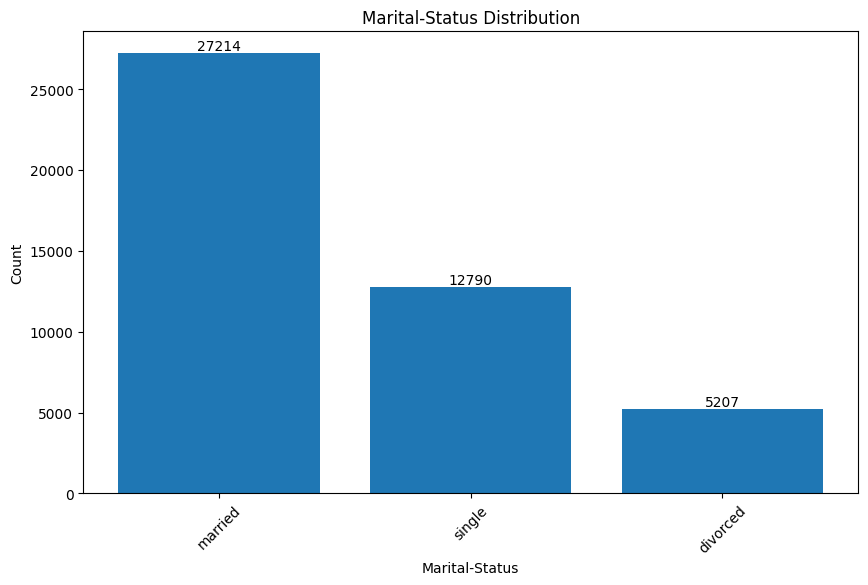

In [16]:
# Univariate analysis - marital-status distribution

marital_dist = train_df['marital'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(marital_dist.index, marital_dist.values)

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Marital-Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Marital-Status Distribution')
plt.show()


##### Education Level Distribution

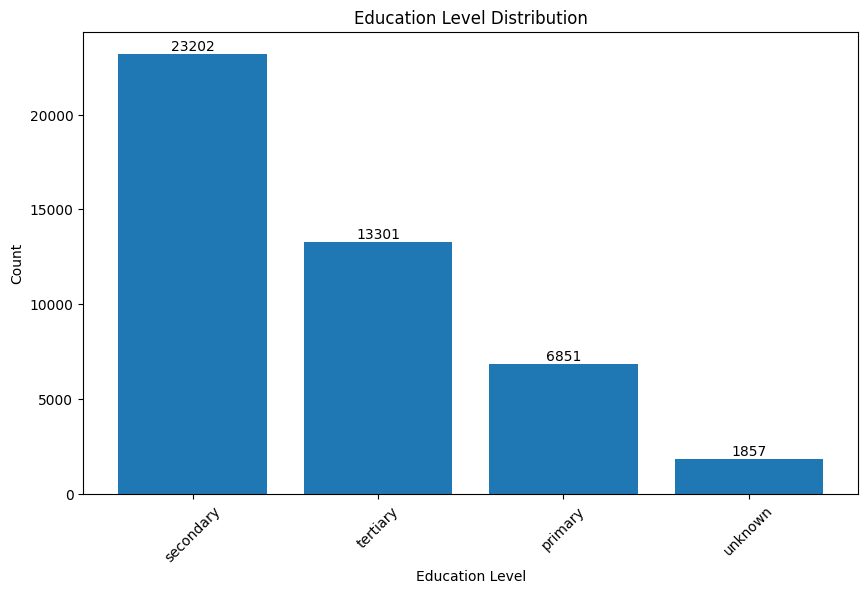

In [17]:
# Univariate analysis - education level distribution

job_counts = train_df['education'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(job_counts.index, job_counts.values)

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Education Level Distribution')
plt.show()


##### Job-Type Distribution

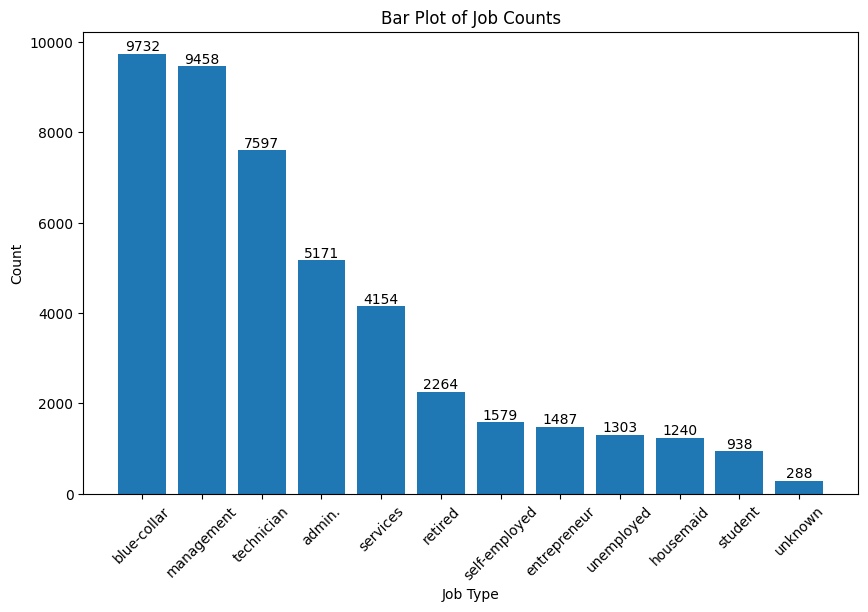

In [18]:

job_counts = train_df['job'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(job_counts.index, job_counts.values)

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Bar Plot of Job Counts')
plt.show()


#### Bivariate Analysis

In [ ]:
plt.figure(figsize=(15,15))

# Pair plot
sns.pairplot(train_df,diag_kind="kde", hue="y",palette=custom_palette)
plt.legend(title="subscribe",loc = "upper right")
plt.suptitle("Pair plot of numeric columns", y=1.02)

Text(0.5, 1.02, 'Pair plot of numeric columns')

##### Month Versus Subscription Rate

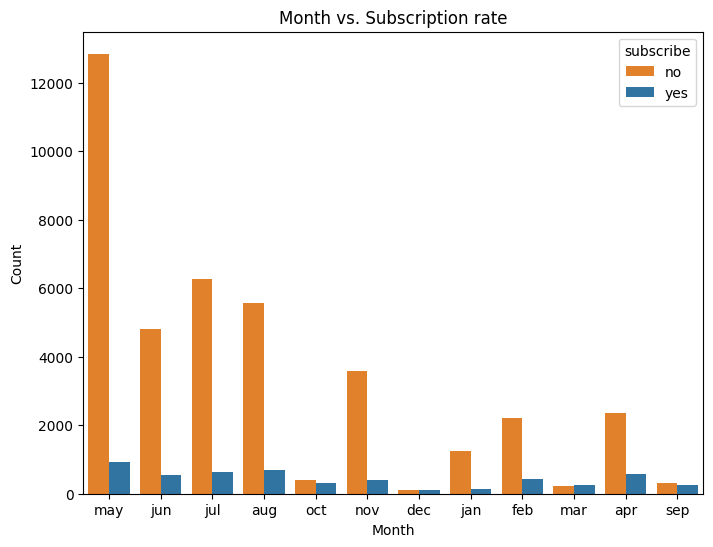

In [ ]:
# Count plot of month vs. subscrition rate
plt.figure(figsize=(8, 6))
sns.countplot(x='month', hue='y', data=train_df, palette = custom_palette)
plt.title('Month vs. Subscription rate')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='subscribe', loc='upper right')
plt.show()

##### Contact Versus Subscription

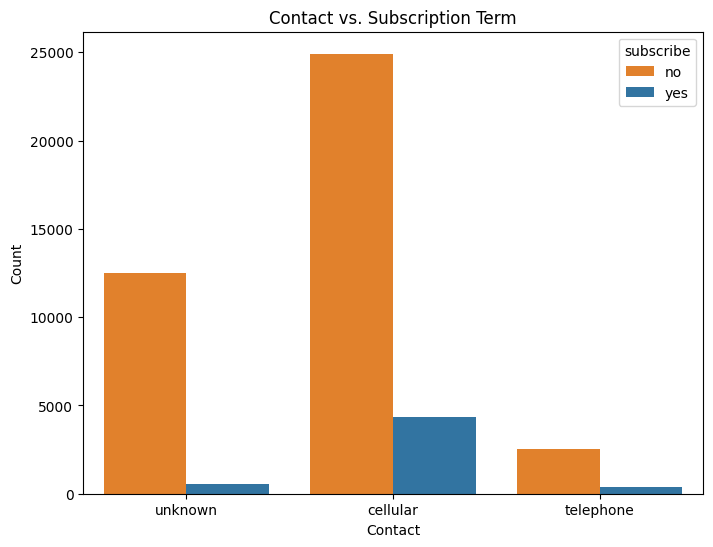

In [ ]:
# Count plot of month vs. subscrition rate
plt.figure(figsize=(8, 6))
sns.countplot(x='contact', hue='y', data=train_df, palette = custom_palette)
plt.title('Contact vs. Subscription Term')
plt.xlabel('Contact')
plt.ylabel('Count')
plt.legend(title='subscribe', loc='upper right')
plt.show()

We can see that those contacted via cellular network, gave a higher chance of subscribing to our deposit term

##### Phik Correlation Matrix

interval columns not set, guessing: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


<Figure size 2000x2000 with 0 Axes>

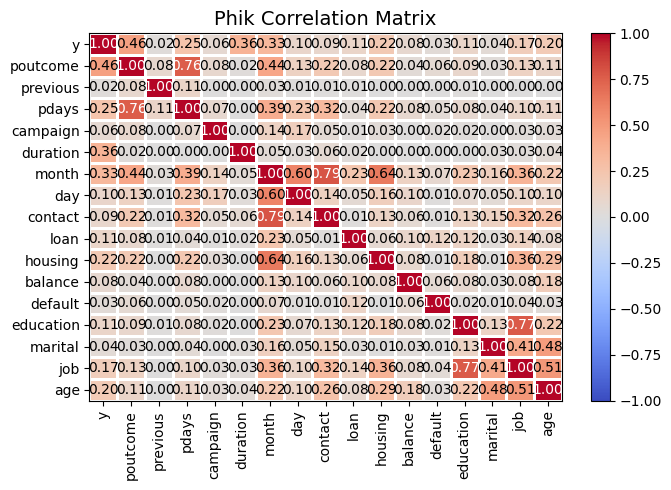

In [ ]:
# plot the phik correlation matrix
plt.figure(figsize=(20,20))
corr_matrix = train_df.phik_matrix()
plot_correlation_matrix(corr_matrix.values,x_labels=corr_matrix.columns,color_map="coolwarm",y_labels=corr_matrix.index,title="Phik Correlation Matrix")
plt.tight_layout()
plt.show()

#### Multivariate Analysis

##### Poutcome Vs Contact vs Subscription Outcome

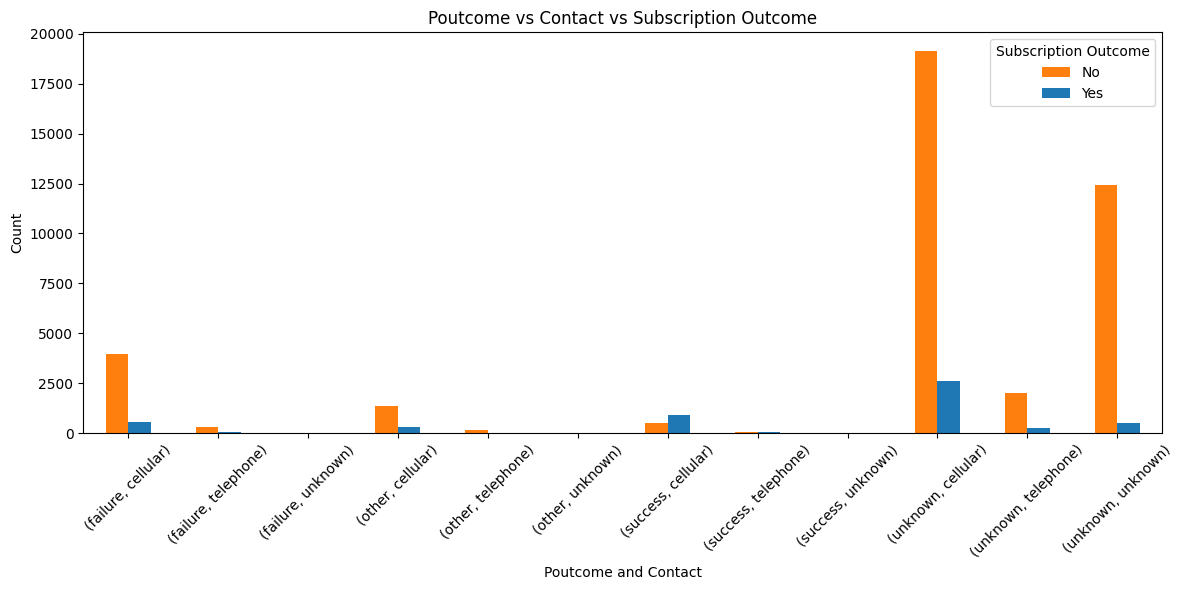

In [ ]:
grouped_data = train_df.groupby(['poutcome', 'contact', 'y']).size().unstack()

# Plotting
grouped_data.plot(kind='bar', figsize=(12, 6), color = custom_palette)
plt.title('Poutcome vs Contact vs Subscription Outcome')
plt.ylabel('Count')
plt.xlabel('Poutcome and Contact')
plt.xticks(rotation=45)
plt.legend(title='Subscription Outcome', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

#### Answering The Business Questions

1. How does the number of campaigns affect the likelihood of a client subscribing to a term deposit?

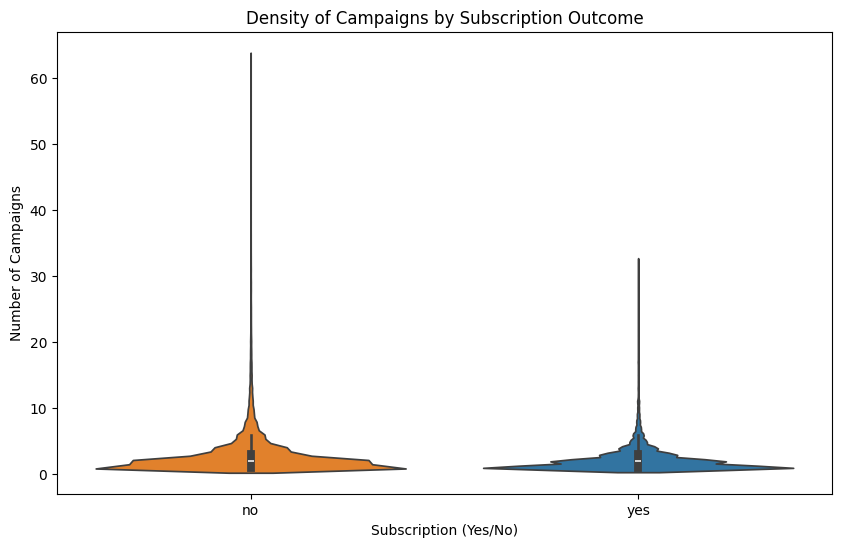

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_df, x='y', y='campaign', palette=custom_palette)
plt.xlabel('Subscription (Yes/No)')
plt.ylabel('Number of Campaigns')
plt.title('Density of Campaigns by Subscription Outcome')
plt.show()


There voilin plots above indicate a higher number of campaigns for customers with No subscription term and fewer with those with "Yes" Subscription term. The median campaigns for each class isn't that different.

#### Client Demographics Against Subcription Outcome

2. What client characteristics (e.g., age, job, marital status, education) are most strongly associated with subscribing to a term deposit?

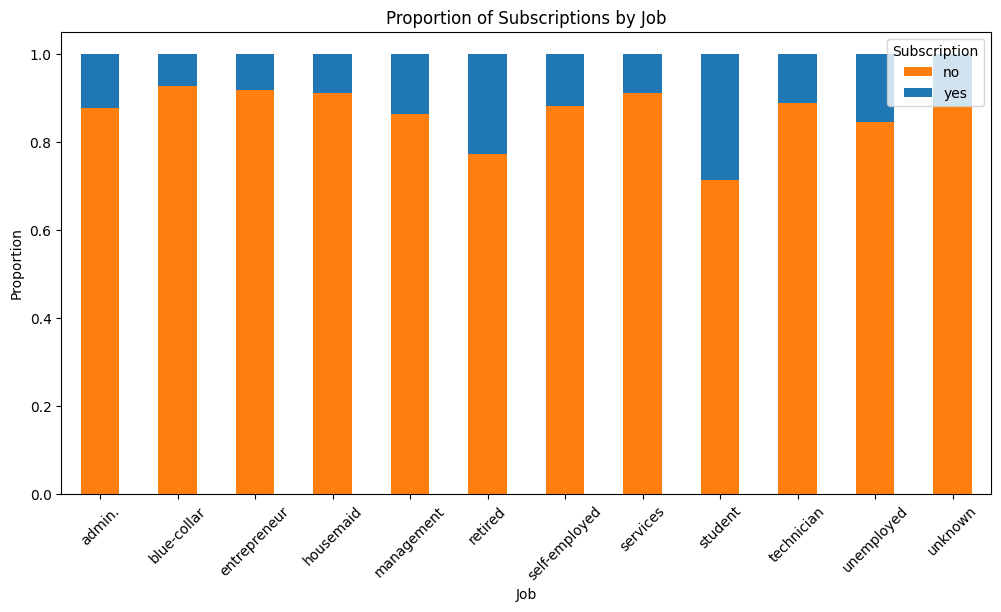

In [ ]:
# Calculate proportions for each category
job_proportions = train_df.groupby(['job','y']).size().unstack(fill_value=0)
job_proportions = job_proportions.div(job_proportions.sum(axis=1),axis=0)

# Plot stacked bar chart
job_proportions.plot(kind='bar', stacked=True, figsize=(12,6),color=custom_palette)
plt.xlabel('Job')
plt.ylabel('Proportion')
plt.title('Proportion of Subscriptions by Job')
plt.legend(title='Subscription', loc='upper right')
plt.xticks(rotation=45)
plt.show()


We can infer from the chat above that a lot of students applied to the bank's deposit term followed by the retired population and those with blue-color jobs contributing to fewer subscriptions. 

##### Age Vrs Subcription terms

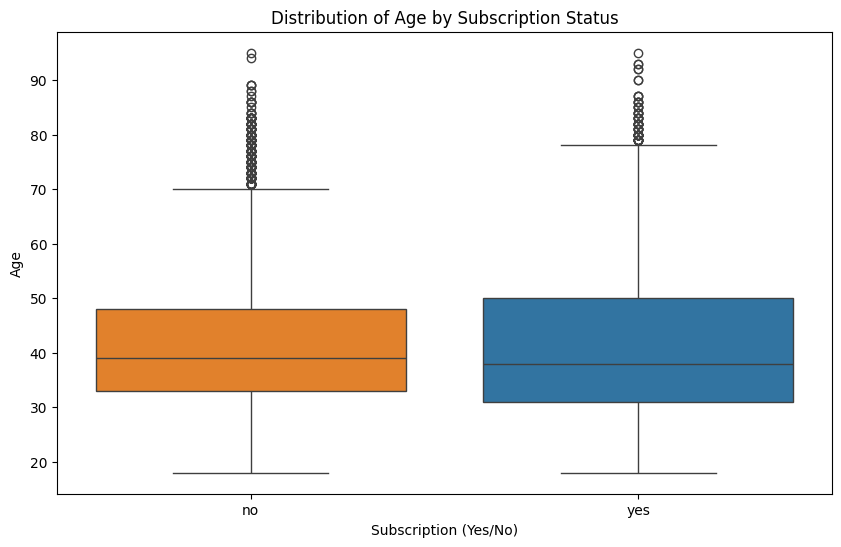

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='y', y='age', palette=custom_palette)
plt.xlabel('Subscription (Yes/No)')
plt.ylabel('Age')
plt.title('Distribution of Age by Subscription Status')
plt.show()



From the visualisation above, we could see there isn't a significant relationship between Age and whether a customer subscribes to the deposit term or not

##### Marital Status Vrs Subscription Terms

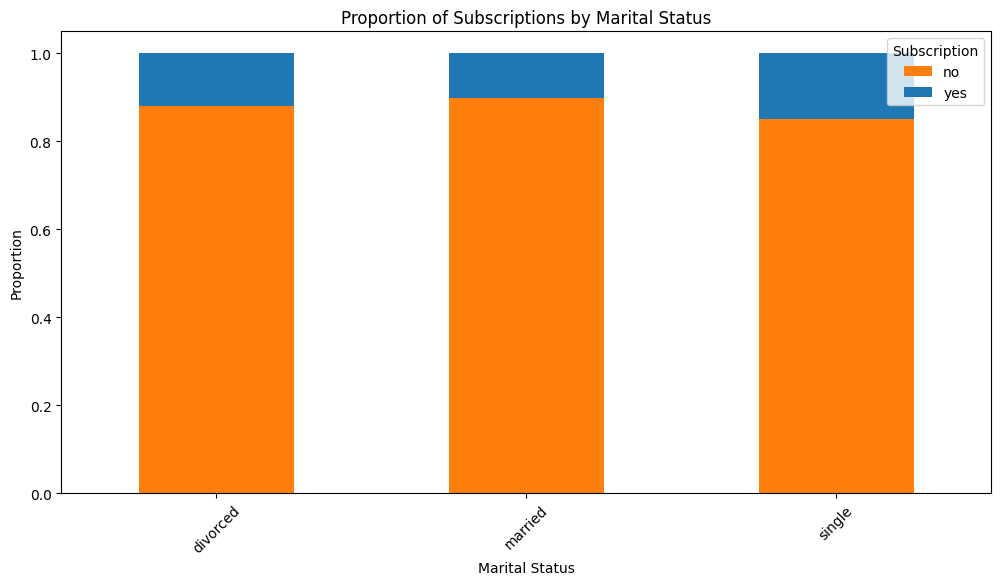

In [ ]:
# Calculate proportions for each category
marital_proportions = train_df.groupby(['marital','y']).size().unstack(fill_value=0)
marital_proportions = marital_proportions.div(marital_proportions.sum(axis=1),axis=0)

# Plot stacked bar chart
marital_proportions.plot(kind='bar', stacked=True, figsize=(12,6),color=custom_palette)
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.title('Proportion of Subscriptions by Marital Status')
plt.legend(title='Subscription', loc='upper right')
plt.xticks(rotation=45)
plt.show()


We can see from the graph above that, a lot singles subscribed to the deposit term as compared to the divorced and married. Could this be as a result of extra responsibilities on the married population?

##### Education Level vs Subsription Terms

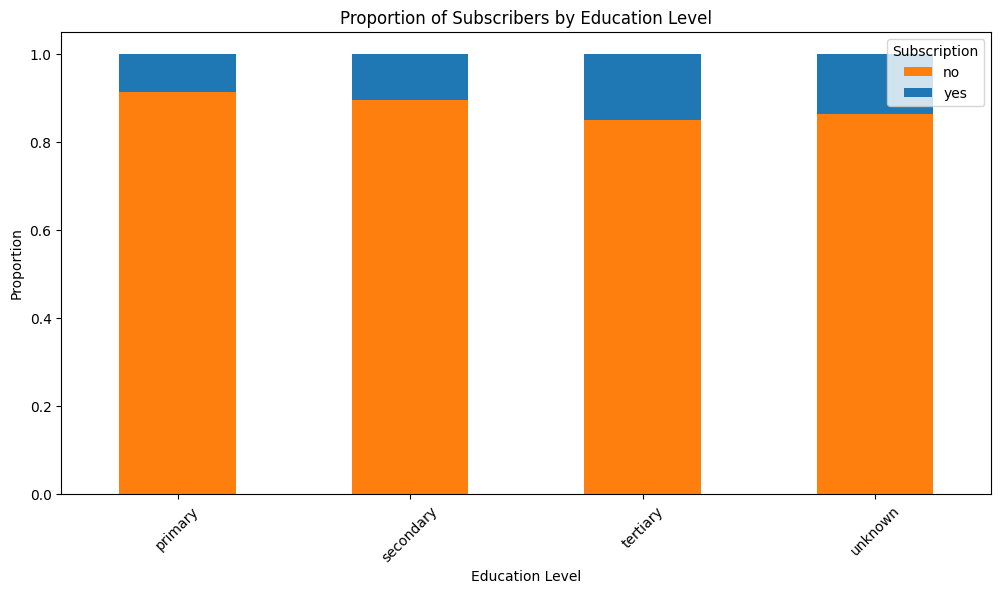

In [ ]:
# Calculate proportions for each category
education_level = train_df.groupby(['education','y']).size().unstack(fill_value=0)
education_level = education_level.div(education_level.sum(axis=1),axis=0)

# Plot stacked bar chart
education_level.plot(kind='bar', stacked=True, figsize=(12,6),color=custom_palette)
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.title('Proportion of Subscribers by Education Level')
plt.legend(title='Subscription', loc='upper right')
plt.xticks(rotation=45)
plt.show()


3. Does the timing of the campaigns (e.g., contact day, month) influence subscription rates?

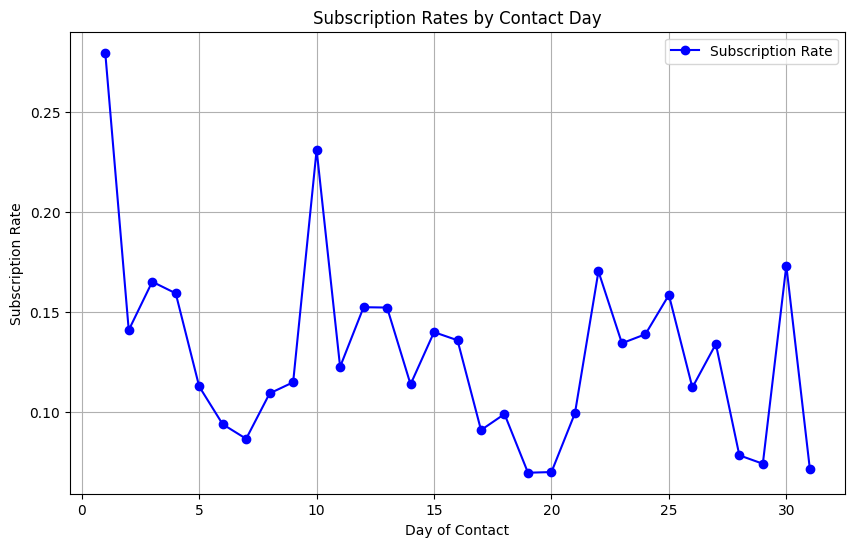

In [ ]:
# Calculate subscription rates for each day
day_subscription = train_df.groupby('day')['y'].value_counts(normalize=True).unstack()

# Plot the subscription rates
plt.figure(figsize=(10, 6))
day_subscription['yes'].plot(kind='line', marker='o', color='b', label='Subscription Rate')
plt.xlabel('Day of Contact')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rates by Contact Day')
plt.grid(True)
plt.legend()
plt.show()


From the line graph, we can see that there is a spike on the subscription deposit in early days of the month, this could be as a result of customers receiving their monthly incomes in early days of the month.

##### Does Contact Month Affect Subscription to the Term Deposit

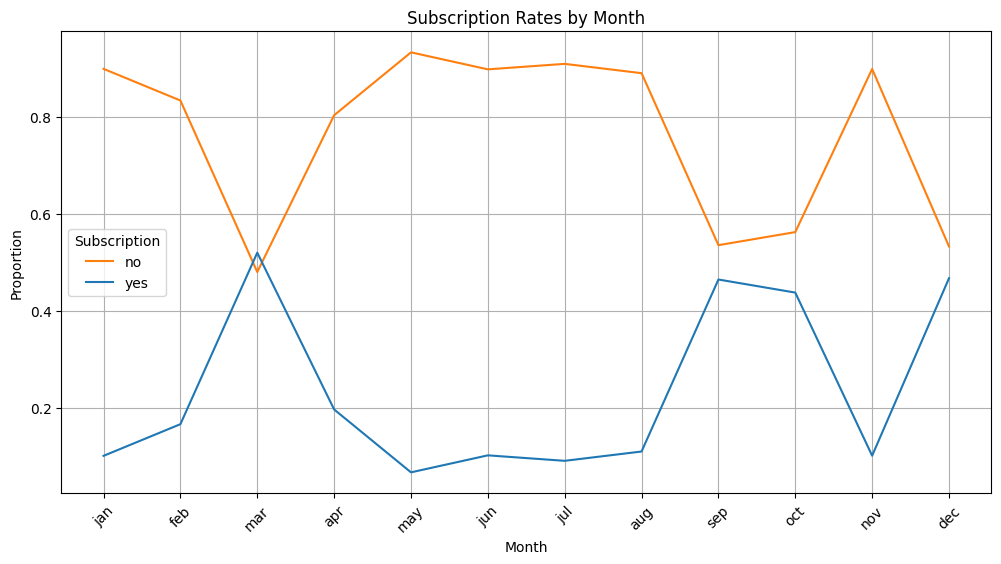

In [ ]:
# Group by month and normalize to get proportions
monthly_subscription = train_df.groupby('month')['y'].value_counts(normalize=True).unstack()

# Ensure months are in the correct order
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_subscription = monthly_subscription.reindex(month_order)

# Reset index to prepare for plotting
monthly_subscription = monthly_subscription.reset_index().melt(id_vars='month', var_name='Subscription', value_name='Proportion')

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_subscription, x='month', y='Proportion', hue='Subscription', palette=custom_palette)
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.title('Subscription Rates by Month')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.grid(True)
plt.show()


From the graph, we can infer the subscription rates peak from Feb- Apr months and we see similar trend from Aug- Sep and the drops from Oct to November until December where it begins to peak again.


4. Is there a diminishing return on additional campaigns (i.e., after a certain point, additional campaigns do not increase subscription rates)?

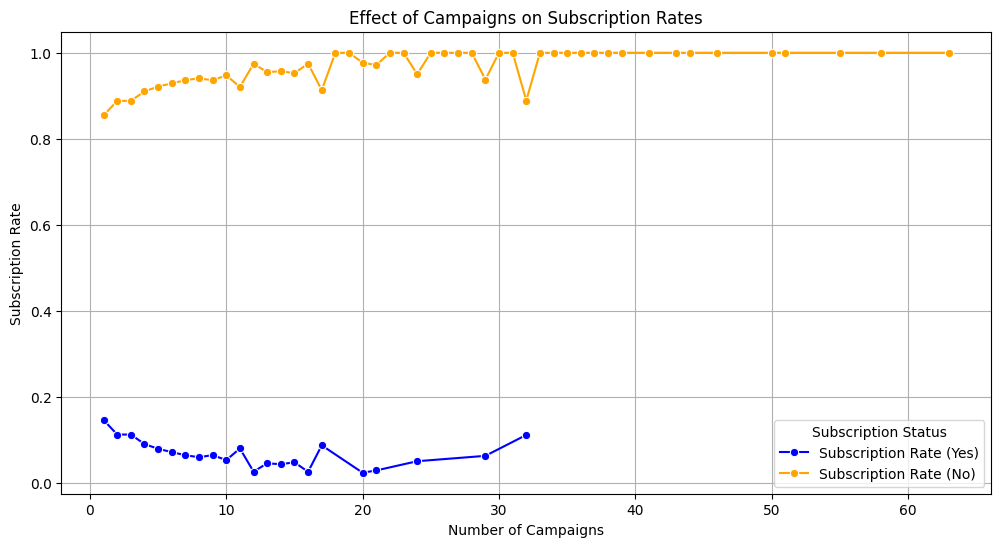

In [ ]:
# Group data by number of campaigns and calculate subscription rates
campaign_subscription = train_df.groupby('campaign')['y'].value_counts(normalize=True).unstack()

# Plot subscription rates for "yes" and "no"
plt.figure(figsize=(12, 6))
sns.lineplot(x=campaign_subscription.index, y=campaign_subscription['yes'], marker='o', label='Subscription Rate (Yes)', color='blue')
sns.lineplot(x=campaign_subscription.index, y=campaign_subscription['no'], marker='o', label='Subscription Rate (No)', color='orange')

# Add titles and labels
plt.title('Effect of Campaigns on Subscription Rates')
plt.xlabel('Number of Campaigns')
plt.ylabel('Subscription Rate')
plt.grid(True)
plt.legend(title='Subscription Status')
plt.show()


- We can visualize that, the rate of customers who subscribed to a deposit term received lesser campaings as compared to those who didn't subscribe.
- We observe that the subcription rate of those who didn't subscribed declined untill after 30 campaigns then it begun to rise which doesn't show a consistent relationship.
- The line graph for the unsubsribers rised until after 30 campaigns that it reached the peak point.
- **In conclusion**, we can infer that the number of campaigns sent to a customer seems nuisance if he doesn't subscribed after few campaigns. As the number of campaigns increases, the subscription rate also decreases.

5. How do past campaign outcomes (poutcome) affect the likelihood of subscription in future campaigns?

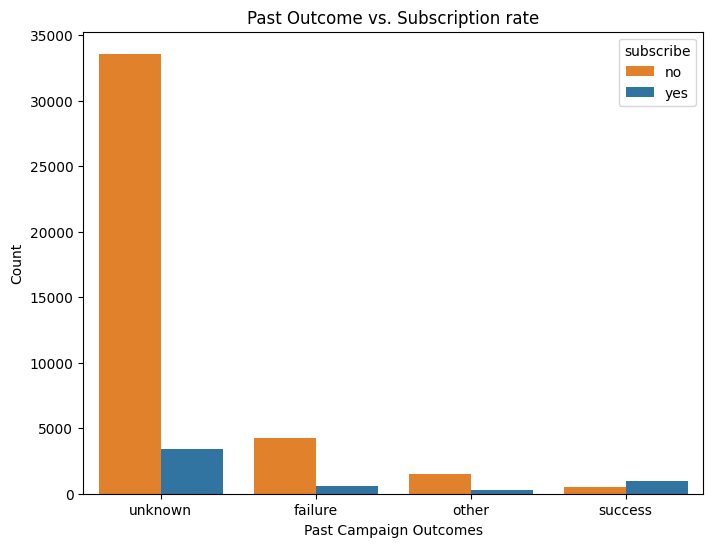

In [ ]:
# Count plot of past campaign outcomes
plt.figure(figsize=(8, 6))
sns.countplot(x='poutcome', hue='y', data=train_df, palette=custom_palette)
plt.title('Past Outcome vs. Subscription rate')
plt.xlabel('Past Campaign Outcomes')
plt.ylabel('Count')
plt.legend(title='subscribe', loc='upper right')
plt.show()


- The past campaign outcomes seem to be a significant factor in determining the likelihood of subscription in future campaigns.


#### Hypothesis Testing


##### Hypothesis Statement
- **Null Hypothesis (Ho)**: The number of campaigns sent to a client does not significantly impact their likelihood of subscribing to a term deposit.
- **Altenate Hypothesis(Ha)**: The number of campaigns sent to a client significantly impacts their likelihood of subscribing to a term deposit.

In [ ]:
# Create contingency table
contingency_table = pd.crosstab(train_df['campaign'], train_df['y'])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table) 

# Results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

if p_value <  0.05:
    print("We reject the null hypothesis; the number of campaigns does not significantly affects subscription likelihood.")
else:
    print("We fail to reject the null hypothesis; the number of campaigns does not significantly affects subscription likelihood")

Chi-Square Statistic: 359.4924794027183
P-Value: 9.89613260623402e-50
We reject the null hypothesis; the number of campaigns does not significantly affects subscription likelihood.


#### Data Preparation

#### Check for Class Imbalance

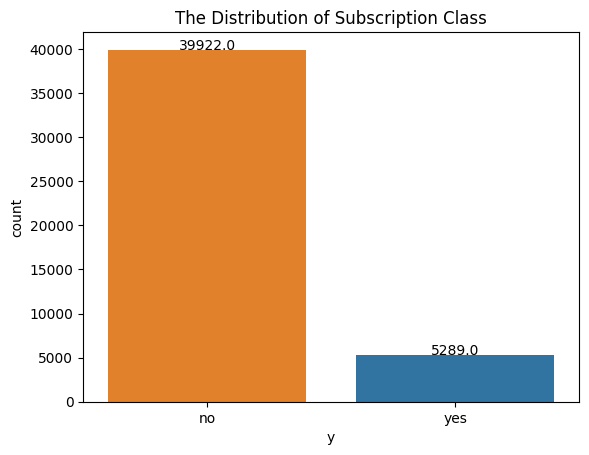

In [ ]:
bars = sns.countplot(data=train_df, x="y", palette=custom_palette)

for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/ 2, height + 5, height, ha='center')
plt.title("The Distribution of Subscription Class")
plt.show()

We can see a significant target-variable imbalance which will be catered for using SMOTE(Synthetic Minority Oversampling Technique) 

#### Feature Engineering

In [ ]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Map all unknown values in dataset with np.nan

def handle_unknown_values(df):
    if df.columns.dtype == "object":
        df = df.replace("unknown", np.nan)    
    return df

In [ ]:
# Apply categorical_unknown function
train_df = handle_unknown_values(train_df)

In [ ]:
# recheck unique values in the categorical variables
print_unique_categorical(train_df)

Column: job
~~~~~~~~~~~
Unique Values: ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']

Column: marital
~~~~~~~~~~~~~~~
Unique Values: ['married' 'single' 'divorced']

Column: education
~~~~~~~~~~~~~~~~~
Unique Values: ['tertiary' 'secondary' nan 'primary']

Column: default
~~~~~~~~~~~~~~~
Unique Values: ['no' 'yes']

Column: housing
~~~~~~~~~~~~~~~
Unique Values: ['yes' 'no']

Column: loan
~~~~~~~~~~~~
Unique Values: ['no' 'yes']

Column: contact
~~~~~~~~~~~~~~~
Unique Values: [nan 'cellular' 'telephone']

Column: month
~~~~~~~~~~~~~
Unique Values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
~~~~~~~~~~~~~~~~
Unique Values: [nan 'failure' 'other' 'success']

Column: y
~~~~~~~~~
Unique Values: ['no' 'yes']



#### Feature Selection

In [ ]:
X = train_df.drop(columns = ["y"])
y = train_df["y"]

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [ ]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

#### Train-Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42,stratify=y)

In [ ]:
# Check the shapes of the training and testing dataset
print(f"Size of trraining dataset: {X_train.shape}")

print(f"Size of test dataset: {X_test.shape}")

Size of trraining dataset: (36168, 16)
Size of test dataset: (9043, 16)


#### Target Variable Encoding

In [ ]:
# Encode the target variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

In [ ]:
# Verify changes on training dataset
y_train_encoded

array([0, 1, 1, ..., 0, 0, 1])

#### Data Preprocessing

In [ ]:
numerical_features = X.select_dtypes(include="number").columns
categorical_features = X.select_dtypes(include="object").columns
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

#### Preprocessor Pipeline

In [ ]:
# Creating the Machine Learning Pipelines
def safe_log1p(X):
    X = np.where(X <= 0, 1e-9, X)  # Replace non-positive values with a small positive constant
    return np.log1p(X)

num_pipeline = Pipeline(
    steps=[
        ("num_imputer",SimpleImputer(strategy="median")),
        ("log_transformer",FunctionTransformer(safe_log1p, feature_names_out="one-to-one")),
        ("num_scaler", RobustScaler())
       
    ]
) 

cat_pipeline = Pipeline (
    steps=[
        ("cat_imputer",SimpleImputer(strategy="most_frequent")),
        ("cat_encoder",OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical_pipeline",num_pipeline,numerical_features),
        ("categorical_pipeline",cat_pipeline,categorical_features)
        
],
remainder="passthrough"
)

In [ ]:
# Check for NaN values
print(X_train.isna().sum())

age              0
job            234
marital          0
education     1482
default          0
balance          0
housing          0
loan             0
contact      10386
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     29589
dtype: int64


- Due to the large number of outliers, I decided to fill all the null values in the numerical columns with the mean strategy since it works well for dataset with a lot of outliers.
- Also, I used the RobustScaler in dealing with outliers in the dataset. Robustscaler scales data using the interquartile range (IQR) which is robust to outliers.

- For categorical columns, I used the most frequent strategy for filling null values.

#### Modeling & Evaluation

##### Model Selection
I considered four (4) models for Sepsis prediction:

- Logistic Regression
- Random Forest Classifier
- XGB Classifier
- Gradient Boosting Classifier

I will evaluate each model's performance using cross-validation to ensure reliable metrics. The key evaluation metric used is f1-score because of data imbalance.

In [ ]:
# Create a list of models to use
models = [
    ("log_regression",LogisticRegression(random_state=42)),
    ("random_forest",RandomForestClassifier(random_state=42)),
    ("xgb_classifier",XGBClassifier()),
    ("gradient_boost",GradientBoostingClassifier(random_state=42))
]

#### Training Model on Unbalanced Dataset

In [ ]:
metrics_table = pd.DataFrame(columns=["model_name","accuracy","precision","recall","f1_score","roc_curve", "conf_matrix"])
all_pipelines = {}

# Loop through the models and get the scores
for model_name, classifier in models:
    pipeline = Pipeline(
        steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k="all")),
        ('classifier',classifier)
        ]
    )
    # fit train data on pipeline
    pipeline.fit(X_train,y_train_encoded)

    # predict on test data
    y_pred = pipeline.predict(X_test)

    # store classification report value in a dictionary
    metrics = classification_report(y_test_encoded,y_pred,output_dict=True)

    # compute the confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded,y_pred)

    # save individual pipeline to the all pipelines dictionary
    all_pipelines[model_name] = pipeline

    # Grab values from unbalanced metric table
    accuracy = metrics["accuracy"]
    precision = metrics["weighted avg"]["precision"]
    recall = metrics["weighted avg"]["recall"]
    f1_score = metrics["weighted avg"]["f1-score"]

    # compute ROC curve variables
    ypredict_proba = pipeline.predict_proba(X_test)[:,1]
    # Unpack all roc curve variables
    fpr,tpr,threshold = roc_curve(y_test_encoded,ypredict_proba)
    # compute AUC
    roc_auc = auc(fpr,tpr)

    # Grab all the metrics and add them to the metrics table
    metrics_table.loc[len(metrics_table)] = [model_name,accuracy,precision,recall,f1_score, roc_auc,conf_matrix]

# Sort metrics based on F1-score
metrics_df = metrics_table.sort_values(by="f1_score",ascending=False)
styled_metrics_df = metrics_df.style.background_gradient(cmap='winter')
styled_metrics_df

,model_name,accuracy,precision,recall,f1_score,roc_curve,conf_matrix
2,xgb_classifier,0.905341,0.895438,0.905341,0.898340,0.922138,[[7708 277] [ 579 479]]
3,gradient_boost,0.905673,0.893667,0.905673,0.895676,0.917888,[[7761 224] [ 629 429]]
1,random_forest,0.903461,0.890009,0.903461,0.891644,0.916338,[[7775 210] [ 663 395]]
0,log_regression,0.901250,0.886462,0.901250,0.887877,0.900595,[[7783 202] [ 691 367]]


#### Visualising the Model's Performance

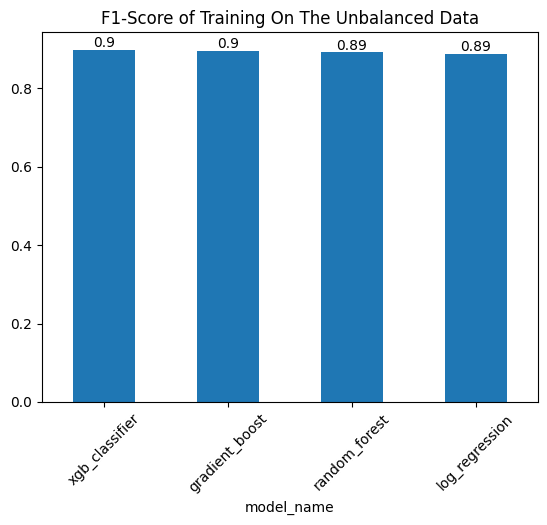

In [ ]:
metrics_df.set_index("model_name",inplace=True)
bar = metrics_df["f1_score"].plot(kind="bar")
# add data labels
for i,v in enumerate(metrics_df["f1_score"]):
    bar.text(i,v, str(round(v,2)), ha="center", va="bottom")
plt.title("F1-Score of Training On The Unbalanced Data")
plt.xticks(rotation = 45)
plt.show()

#### Handling Class Imbalance
In the context of this project, I encountered class imbalance issues from the target "y" class with No = 39922 and Yes = 5289. This means the model's performance will be biased towards the Positive class.

In order for me to tackle this challenge, I used SMOTE(Synthetic Minority Over Sampling Techniques) to generate synthetic samples for the minority class. The objective for this step is to remove the class imbalance issue.

#### Training the Model On Balanced Dataset

In [ ]:
balanced_metrics_table = pd.DataFrame(columns=["model_name","accuracy","precision","recall","f1_score","roc_auc","conf_matrix"])
balanced_pipelines = {}

# Loop through the models and get the scores
for model_name, classifier in models:
    pipeline = ImbPipeline(
        steps=[
        ('preprocessor',preprocessor),
        ('smote',SMOTE(sampling_strategy="auto",k_neighbors=5, random_state=42)),
        ('feature_importance',SelectKBest(mutual_info_classif,k="all")),
        ('classifier',classifier)
        ]
    )
    # fit train data on pipeline
    pipeline.fit(X_train,y_train_encoded)

    # predict on test data
    y_pred = pipeline.predict(X_test)

    # store classification report value in a dictionary
    balanced_metrics = classification_report(y_test_encoded,y_pred,output_dict=True)

    # compute the confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded,y_pred)

    # save individual pipeline to the all pipelines dictionary
    balanced_pipelines[model_name] = pipeline

    # Grab values from unbalanced metric table
    accuracy = balanced_metrics["accuracy"]
    precision = balanced_metrics["weighted avg"]["precision"]
    recall = balanced_metrics["weighted avg"]["recall"]
    f1_score = balanced_metrics["weighted avg"]["f1-score"]

    # compute ROC curve variables
    ypredict_proba = pipeline.predict_proba(X_test)[:,1]
    # Unpack all roc curve variables
    fpr,tpr,threshold = roc_curve(y_test_encoded,ypredict_proba)
    # compute AUC
    roc_auc = auc(fpr,tpr)

    # Grab all the metrics and add them to the metrics table
    balanced_metrics_table.loc[len(balanced_metrics_table)] = [model_name,accuracy,precision,recall,f1_score,roc_auc,conf_matrix]

# Sort metrics based on F1-score
balanced_metrics_table.sort_values(by="accuracy",ascending=False)

balanced_metrics_df = balanced_metrics_table.sort_values(by="accuracy",ascending=False) 
styled_balanced_metrics_df = balanced_metrics_df.style.background_gradient(cmap='winter')

styled_balanced_metrics_df

,model_name,accuracy,precision,recall,f1_score,roc_auc,conf_matrix
2,xgb_classifier,0.903351,0.900283,0.903351,0.901693,0.921232,[[7588 397] [ 477 581]]
1,random_forest,0.896495,0.897520,0.896495,0.896997,0.918195,[[7505 480] [ 456 602]]
3,gradient_boost,0.870618,0.906366,0.870618,0.883076,0.913227,[[7075 910] [ 260 798]]
0,log_regression,0.825279,0.903656,0.825279,0.849858,0.900409,[[6592 1393] [ 187 871]]


#### Visualizing Accuracy-score on the Balanced Data

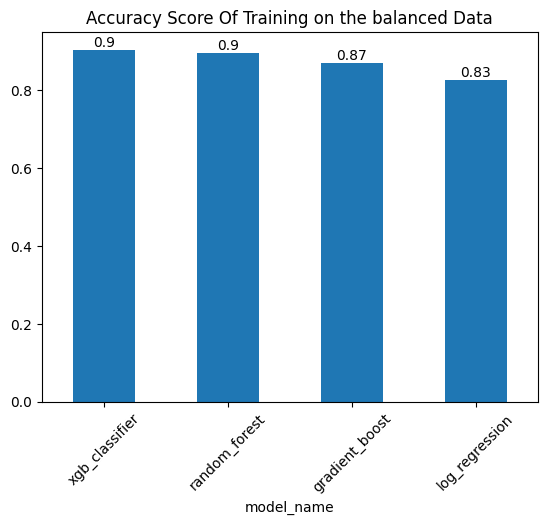

In [ ]:
balanced_metrics_df.set_index("model_name",inplace=True)
bar = balanced_metrics_df["accuracy"].plot(kind="bar")
# add data labels
for i,v in enumerate(balanced_metrics_df["accuracy"]):
    bar.text(i,v, str(round(v,2)), ha="center", va="bottom")
plt.title("Accuracy Score Of Training on the balanced Data")
plt.xticks(rotation = 45)
plt.show()

#### Hyperparameter Tuning Using Optuna


**Optuna** is an open-source Python library for hyperparameter optimization. Developed by the Japanese company Preferred Networks, Optuna provides an elegant and automated way to search for the best hyperparameters by optimizing an objective function. It is designed to be user-friendly and highly adaptable to different machine learning frameworks.

**Optuna operates based on a three-step process:**

**Define the Search Space:** Users specify the range and type of hyperparameters to optimize, such as integer, float, or categorical values. This step defines the search space that Optuna will explore.

**Define the Objective Function:** The objective function is the core of the optimization process. It evaluates the performance of the model for a given set of hyperparameters. Optuna aims to minimize or maximize this function, depending on the optimization goal.

**Optimization:** Optuna uses Bayesian optimization to sample different hyperparameter configurations. It iteratively evaluates these configurations and updates the probabilistic model, narrowing down the search space. The process continues until a satisfactory set of hyperparameters is found.

In [ ]:
# Store the fine-tuned models in a table
fine_tuned_metrics_table = pd.DataFrame(columns=["model_name","accuracy","precision","recall","f1_score","roc_auc","confusion_matrix"])

# Define parameter grids for Optuna
param_grids = {
    "log_regression": {
        "classifier__penalty": ["l2"],
        "classifier__C": np.logspace(-4, 4, 20),
        "classifier__solver": ["liblinear", "lbfgs", "newton-cg", "sag", "saga"]
    },
    "gradient_boost": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__learning_rate": [0.01, 0.1, 0.2]
    },
    
    "xgb_classifier": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__learning_rate": [0.01, 0.1, 0.2],
        "classifier__max_depth": [3, 5, 7]
    },
    "random_forest": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__max_depth": [3, 5, 7]
    }
}

# Objective function for Optuna
def objective(trial, model_name, pipeline, X_train, y_train, X_test, y_test):

    """
    Objective function for Optuna.
    It evaluates the performance of the model for a given set of hyperparameters.
    """
    param_grid = param_grids[model_name]

    params = {key: trial.suggest_categorical(key, value) if isinstance(value, list) else trial.suggest_float(key, min(value), max(value))
              for key, value in param_grid.items()}

    # unpack params into pipeline
    pipeline.set_params(**params)
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    return optuna_f1_score(y_test, y_pred, average='weighted')


# Perform Optuna search for each model
for model_name, pipeline in balanced_pipelines.items():
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, model_name, pipeline, X_train, y_train_encoded, X_test, y_test_encoded), n_trials=20,show_progress_bar=True)
    
    # Update best pipeline
    best_params = study.best_params
    pipeline.set_params(**best_params)
    pipeline.fit(X_train, y_train_encoded)
    balanced_pipelines[model_name] = pipeline
    
    # Make predictions with the best pipeline
    y_pred = pipeline.predict(X_test)

    # Store classification report in a tuned_metrics table
    tuned_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)

    # Grab values from the tuned metric table
    accuracy = tuned_metrics["accuracy"]
    precision = tuned_metrics["weighted avg"]["precision"]
    recall = tuned_metrics["weighted avg"]["recall"]
    f1_score = tuned_metrics["weighted avg"]["f1-score"]
    
    # Compute ROC curve variables
    ypredict_proba = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, threshold = roc_curve(y_test_encoded, ypredict_proba)
    roc_auc = auc(fpr, tpr)
    
    # Add values to the tuned_metrics_table
    fine_tuned_metrics_table.loc[len(fine_tuned_metrics_table)] = [model_name, accuracy, precision, recall, f1_score, roc_auc, conf_matrix]

# Sort values by the f1-score
tuned_metrics_df = fine_tuned_metrics_table.sort_values(by="f1_score", ascending=False)
styled_tuned_metrics_df = tuned_metrics_df.style.background_gradient(cmap='winter')
styled_tuned_metrics_df

[I 2024-12-09 17:28:13,777] A new study created in memory with name: no-name-850242af-6326-4934-a9e3-9e29a2941fcc
Best trial: 0. Best value: 0.849922:   5%|▌         | 1/20 [00:30<09:34, 30.25s/it]

[I 2024-12-09 17:28:44,036] Trial 0 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 694.3854164090885, 'classifier__solver': 'liblinear'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  10%|█         | 2/20 [01:01<09:15, 30.85s/it]

[I 2024-12-09 17:29:15,297] Trial 1 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 7367.17219538291, 'classifier__solver': 'sag'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  15%|█▌        | 3/20 [01:30<08:32, 30.12s/it]

[I 2024-12-09 17:29:44,556] Trial 2 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 5924.16775212967, 'classifier__solver': 'liblinear'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  20%|██        | 4/20 [02:00<07:57, 29.82s/it]

[I 2024-12-09 17:30:13,925] Trial 3 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 5781.088502033493, 'classifier__solver': 'liblinear'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  25%|██▌       | 5/20 [02:30<07:32, 30.19s/it]

[I 2024-12-09 17:30:44,777] Trial 4 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 765.1255312252583, 'classifier__solver': 'sag'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  30%|███       | 6/20 [03:01<07:03, 30.22s/it]

[I 2024-12-09 17:31:15,053] Trial 5 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 1283.2812676287933, 'classifier__solver': 'saga'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  35%|███▌      | 7/20 [03:30<06:28, 29.88s/it]

[I 2024-12-09 17:31:44,231] Trial 6 finished with value: 0.8498372693430152 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 759.3932508552027, 'classifier__solver': 'newton-cg'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  40%|████      | 8/20 [04:00<05:59, 29.99s/it]

[I 2024-12-09 17:32:14,460] Trial 7 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 1693.7541164768961, 'classifier__solver': 'saga'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  45%|████▌     | 9/20 [04:32<05:36, 30.56s/it]

[I 2024-12-09 17:32:46,267] Trial 8 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 9157.852920065192, 'classifier__solver': 'sag'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  50%|█████     | 10/20 [05:01<05:01, 30.11s/it]

[I 2024-12-09 17:33:15,357] Trial 9 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 6284.5848935866925, 'classifier__solver': 'liblinear'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  55%|█████▌    | 11/20 [05:30<04:28, 29.84s/it]

[I 2024-12-09 17:33:44,587] Trial 10 finished with value: 0.8498372693430152 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 3379.709120607811, 'classifier__solver': 'lbfgs'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  60%|██████    | 12/20 [06:01<04:01, 30.16s/it]

[I 2024-12-09 17:34:15,480] Trial 11 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 8633.43626800065, 'classifier__solver': 'sag'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  65%|██████▌   | 13/20 [06:31<03:29, 29.90s/it]

[I 2024-12-09 17:34:44,785] Trial 12 finished with value: 0.8498372693430152 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 7567.600299492295, 'classifier__solver': 'lbfgs'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  70%|███████   | 14/20 [07:00<02:58, 29.72s/it]

[I 2024-12-09 17:35:14,088] Trial 13 finished with value: 0.8498372693430152 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 3420.232392242764, 'classifier__solver': 'newton-cg'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  75%|███████▌  | 15/20 [07:29<02:27, 29.56s/it]

[I 2024-12-09 17:35:43,262] Trial 14 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 4052.3350467439805, 'classifier__solver': 'liblinear'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  80%|████████  | 16/20 [08:00<02:00, 30.07s/it]

[I 2024-12-09 17:36:14,545] Trial 15 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 7263.55381829965, 'classifier__solver': 'sag'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  85%|████████▌ | 17/20 [08:31<01:31, 30.34s/it]

[I 2024-12-09 17:36:45,513] Trial 16 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 2348.8391018348607, 'classifier__solver': 'sag'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  90%|█████████ | 18/20 [09:00<00:59, 29.99s/it]

[I 2024-12-09 17:37:14,669] Trial 17 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 9987.882100083634, 'classifier__solver': 'liblinear'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922:  95%|█████████▌| 19/20 [09:31<00:30, 30.06s/it]

[I 2024-12-09 17:37:44,912] Trial 18 finished with value: 0.8499219380465373 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 4575.395768898292, 'classifier__solver': 'saga'}. Best is trial 0 with value: 0.8499219380465373.


Best trial: 0. Best value: 0.849922: 100%|██████████| 20/20 [10:00<00:00, 30.02s/it]


[I 2024-12-09 17:38:14,252] Trial 19 finished with value: 0.8498372693430152 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 7170.2399540570295, 'classifier__solver': 'newton-cg'}. Best is trial 0 with value: 0.8499219380465373.


[I 2024-12-09 17:38:43,456] A new study created in memory with name: no-name-1b920c09-f2d5-463a-90bb-4a9ce8c4eebf
Best trial: 0. Best value: 0.852582:   5%|▌         | 1/20 [00:33<10:37, 33.54s/it]

[I 2024-12-09 17:39:16,991] Trial 0 finished with value: 0.8525819061894582 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 5}. Best is trial 0 with value: 0.8525819061894582.


Best trial: 0. Best value: 0.852582:  10%|█         | 2/20 [01:05<09:46, 32.56s/it]

[I 2024-12-09 17:39:48,873] Trial 1 finished with value: 0.8495323930239755 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.8525819061894582.


Best trial: 0. Best value: 0.852582:  15%|█▌        | 3/20 [01:38<09:21, 33.02s/it]

[I 2024-12-09 17:40:22,443] Trial 2 finished with value: 0.8525819061894582 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 5}. Best is trial 0 with value: 0.8525819061894582.


Best trial: 3. Best value: 0.860335:  20%|██        | 4/20 [02:20<09:42, 36.43s/it]

[I 2024-12-09 17:41:04,095] Trial 3 finished with value: 0.8603347712758709 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 7}. Best is trial 3 with value: 0.8603347712758709.


Best trial: 3. Best value: 0.860335:  25%|██▌       | 5/20 [02:51<08:38, 34.56s/it]

[I 2024-12-09 17:41:35,353] Trial 4 finished with value: 0.8525504761547451 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 5}. Best is trial 3 with value: 0.8603347712758709.


Best trial: 3. Best value: 0.860335:  30%|███       | 6/20 [03:28<08:12, 35.19s/it]

[I 2024-12-09 17:42:11,756] Trial 5 finished with value: 0.842698907348436 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3}. Best is trial 3 with value: 0.8603347712758709.


Best trial: 3. Best value: 0.860335:  35%|███▌      | 7/20 [03:59<07:20, 33.87s/it]

[I 2024-12-09 17:42:42,903] Trial 6 finished with value: 0.8495323930239755 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 3}. Best is trial 3 with value: 0.8603347712758709.


Best trial: 3. Best value: 0.860335:  40%|████      | 8/20 [04:38<07:05, 35.46s/it]

[I 2024-12-09 17:43:21,759] Trial 7 finished with value: 0.8524831906220892 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 5}. Best is trial 3 with value: 0.8603347712758709.


Best trial: 8. Best value: 0.861824:  45%|████▌     | 9/20 [05:10<06:17, 34.34s/it]

[I 2024-12-09 17:43:53,655] Trial 8 finished with value: 0.8618235268753096 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 7}. Best is trial 8 with value: 0.8618235268753096.


Best trial: 8. Best value: 0.861824:  50%|█████     | 10/20 [05:45<05:47, 34.72s/it]

[I 2024-12-09 17:44:29,204] Trial 9 finished with value: 0.842698907348436 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3}. Best is trial 8 with value: 0.8618235268753096.


Best trial: 8. Best value: 0.861824:  55%|█████▌    | 11/20 [06:17<05:05, 33.90s/it]

[I 2024-12-09 17:45:01,262] Trial 10 finished with value: 0.8618235268753096 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 7}. Best is trial 8 with value: 0.8618235268753096.


Best trial: 8. Best value: 0.861824:  60%|██████    | 12/20 [06:49<04:26, 33.29s/it]

[I 2024-12-09 17:45:33,160] Trial 11 finished with value: 0.8618235268753096 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 7}. Best is trial 8 with value: 0.8618235268753096.


Best trial: 8. Best value: 0.861824:  65%|██████▌   | 13/20 [07:21<03:50, 32.88s/it]

[I 2024-12-09 17:46:05,081] Trial 12 finished with value: 0.8618235268753096 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 7}. Best is trial 8 with value: 0.8618235268753096.


Best trial: 8. Best value: 0.861824:  70%|███████   | 14/20 [07:53<03:15, 32.59s/it]

[I 2024-12-09 17:46:37,016] Trial 13 finished with value: 0.8618235268753096 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 7}. Best is trial 8 with value: 0.8618235268753096.


Best trial: 8. Best value: 0.861824:  75%|███████▌  | 15/20 [08:25<02:41, 32.37s/it]

[I 2024-12-09 17:47:08,864] Trial 14 finished with value: 0.8618235268753096 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 7}. Best is trial 8 with value: 0.8618235268753096.


Best trial: 8. Best value: 0.861824:  80%|████████  | 16/20 [08:57<02:09, 32.43s/it]

[I 2024-12-09 17:47:41,430] Trial 15 finished with value: 0.8618235268753096 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 7}. Best is trial 8 with value: 0.8618235268753096.


Best trial: 8. Best value: 0.861824:  85%|████████▌ | 17/20 [09:33<01:39, 33.29s/it]

[I 2024-12-09 17:48:16,729] Trial 16 finished with value: 0.8605571447160499 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 7}. Best is trial 8 with value: 0.8618235268753096.


Best trial: 8. Best value: 0.861824:  90%|█████████ | 18/20 [10:05<01:05, 32.86s/it]

[I 2024-12-09 17:48:48,574] Trial 17 finished with value: 0.8618235268753096 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 7}. Best is trial 8 with value: 0.8618235268753096.


Best trial: 8. Best value: 0.861824:  95%|█████████▌| 19/20 [10:37<00:32, 32.60s/it]

[I 2024-12-09 17:49:20,569] Trial 18 finished with value: 0.8618235268753096 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 7}. Best is trial 8 with value: 0.8618235268753096.


Best trial: 8. Best value: 0.861824: 100%|██████████| 20/20 [11:12<00:00, 33.62s/it]


[I 2024-12-09 17:49:55,874] Trial 19 finished with value: 0.8605571447160499 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 7}. Best is trial 8 with value: 0.8618235268753096.


[I 2024-12-09 17:50:27,754] A new study created in memory with name: no-name-91337fea-3ab8-42e4-839b-258abb673095
Best trial: 0. Best value: 0.86382:   5%|▌         | 1/20 [00:30<09:33, 30.17s/it]

[I 2024-12-09 17:50:57,921] Trial 0 finished with value: 0.8638202611518719 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.8638202611518719.


Best trial: 1. Best value: 0.897505:  10%|█         | 2/20 [01:01<09:10, 30.59s/it]

[I 2024-12-09 17:51:28,801] Trial 1 finished with value: 0.8975050905285495 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 7}. Best is trial 1 with value: 0.8975050905285495.


Best trial: 2. Best value: 0.897723:  15%|█▌        | 3/20 [01:33<08:54, 31.45s/it]

[I 2024-12-09 17:52:01,266] Trial 2 finished with value: 0.897722584314316 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7}. Best is trial 2 with value: 0.897722584314316.


Best trial: 2. Best value: 0.897723:  20%|██        | 4/20 [02:03<08:13, 30.86s/it]

[I 2024-12-09 17:52:31,239] Trial 3 finished with value: 0.8260836571627367 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3}. Best is trial 2 with value: 0.897722584314316.


Best trial: 2. Best value: 0.897723:  25%|██▌       | 5/20 [02:33<07:38, 30.57s/it]

[I 2024-12-09 17:53:01,283] Trial 4 finished with value: 0.8638202611518719 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3}. Best is trial 2 with value: 0.897722584314316.


Best trial: 2. Best value: 0.897723:  30%|███       | 6/20 [03:05<07:12, 30.88s/it]

[I 2024-12-09 17:53:32,767] Trial 5 finished with value: 0.893378083131282 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3}. Best is trial 2 with value: 0.897722584314316.


Best trial: 2. Best value: 0.897723:  35%|███▌      | 7/20 [03:34<06:36, 30.52s/it]

[I 2024-12-09 17:54:02,549] Trial 6 finished with value: 0.8260836571627367 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3}. Best is trial 2 with value: 0.897722584314316.


Best trial: 7. Best value: 0.90382:  40%|████      | 8/20 [04:10<06:24, 32.05s/it] 

[I 2024-12-09 17:54:37,875] Trial 7 finished with value: 0.9038200781635727 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7}. Best is trial 7 with value: 0.9038200781635727.


Best trial: 7. Best value: 0.90382:  45%|████▌     | 9/20 [04:48<06:13, 33.93s/it]

[I 2024-12-09 17:55:15,943] Trial 8 finished with value: 0.8697249840278786 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 7}. Best is trial 7 with value: 0.9038200781635727.


Best trial: 7. Best value: 0.90382:  50%|█████     | 10/20 [05:19<05:32, 33.23s/it]

[I 2024-12-09 17:55:47,611] Trial 9 finished with value: 0.8479314519243843 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 5}. Best is trial 7 with value: 0.9038200781635727.


Best trial: 7. Best value: 0.90382:  55%|█████▌    | 11/20 [05:52<04:58, 33.13s/it]

[I 2024-12-09 17:56:20,522] Trial 10 finished with value: 0.9017943172234443 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5}. Best is trial 7 with value: 0.9038200781635727.


Best trial: 7. Best value: 0.90382:  60%|██████    | 12/20 [06:25<04:24, 33.11s/it]

[I 2024-12-09 17:56:53,572] Trial 11 finished with value: 0.9017943172234443 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5}. Best is trial 7 with value: 0.9038200781635727.


Best trial: 7. Best value: 0.90382:  65%|██████▌   | 13/20 [06:58<03:51, 33.10s/it]

[I 2024-12-09 17:57:26,663] Trial 12 finished with value: 0.9017943172234443 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5}. Best is trial 7 with value: 0.9038200781635727.


Best trial: 7. Best value: 0.90382:  70%|███████   | 14/20 [07:31<03:18, 33.06s/it]

[I 2024-12-09 17:57:59,630] Trial 13 finished with value: 0.9017943172234443 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5}. Best is trial 7 with value: 0.9038200781635727.


Best trial: 7. Best value: 0.90382:  75%|███████▌  | 15/20 [08:07<02:49, 33.80s/it]

[I 2024-12-09 17:58:35,155] Trial 14 finished with value: 0.9038200781635727 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7}. Best is trial 7 with value: 0.9038200781635727.


Best trial: 7. Best value: 0.90382:  80%|████████  | 16/20 [08:42<02:17, 34.29s/it]

[I 2024-12-09 17:59:10,586] Trial 15 finished with value: 0.9038200781635727 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7}. Best is trial 7 with value: 0.9038200781635727.


Best trial: 7. Best value: 0.90382:  85%|████████▌ | 17/20 [09:18<01:43, 34.65s/it]

[I 2024-12-09 17:59:46,063] Trial 16 finished with value: 0.9038200781635727 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7}. Best is trial 7 with value: 0.9038200781635727.


Best trial: 7. Best value: 0.90382:  90%|█████████ | 18/20 [09:50<01:08, 34.05s/it]

[I 2024-12-09 18:00:18,722] Trial 17 finished with value: 0.897722584314316 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7}. Best is trial 7 with value: 0.9038200781635727.


Best trial: 7. Best value: 0.90382:  95%|█████████▌| 19/20 [10:26<00:34, 34.43s/it]

[I 2024-12-09 18:00:54,045] Trial 18 finished with value: 0.9038200781635727 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7}. Best is trial 7 with value: 0.9038200781635727.


Best trial: 7. Best value: 0.90382: 100%|██████████| 20/20 [11:01<00:00, 33.08s/it]


[I 2024-12-09 18:01:29,377] Trial 19 finished with value: 0.9038200781635727 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7}. Best is trial 7 with value: 0.9038200781635727.


[I 2024-12-09 18:02:05,080] A new study created in memory with name: no-name-607c66cf-11fd-44de-b1a8-c236abded2e7
Best trial: 0. Best value: 0.884901:   5%|▌         | 1/20 [00:42<13:32, 42.77s/it]

[I 2024-12-09 18:02:47,840] Trial 0 finished with value: 0.8849009467875846 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.2}. Best is trial 0 with value: 0.8849009467875846.


Best trial: 0. Best value: 0.884901:  10%|█         | 2/20 [02:05<19:55, 66.44s/it]

[I 2024-12-09 18:04:10,848] Trial 1 finished with value: 0.8441733082279363 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.01}. Best is trial 0 with value: 0.8849009467875846.


Best trial: 2. Best value: 0.896311:  15%|█▌        | 3/20 [03:28<20:56, 73.89s/it]

[I 2024-12-09 18:05:33,603] Trial 2 finished with value: 0.8963105794650986 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1}. Best is trial 2 with value: 0.8963105794650986.


Best trial: 2. Best value: 0.896311:  20%|██        | 4/20 [04:24<17:49, 66.85s/it]

[I 2024-12-09 18:06:29,666] Trial 3 finished with value: 0.8279327779717418 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.01}. Best is trial 2 with value: 0.8963105794650986.


Best trial: 2. Best value: 0.896311:  25%|██▌       | 5/20 [05:47<18:11, 72.79s/it]

[I 2024-12-09 18:07:52,993] Trial 4 finished with value: 0.8441733082279363 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.01}. Best is trial 2 with value: 0.8963105794650986.


Best trial: 2. Best value: 0.896311:  30%|███       | 6/20 [07:10<17:46, 76.17s/it]

[I 2024-12-09 18:09:15,725] Trial 5 finished with value: 0.8963105794650986 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1}. Best is trial 2 with value: 0.8963105794650986.


Best trial: 2. Best value: 0.896311:  35%|███▌      | 7/20 [08:06<15:04, 69.55s/it]

[I 2024-12-09 18:10:11,654] Trial 6 finished with value: 0.8279327779717418 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.01}. Best is trial 2 with value: 0.8963105794650986.


Best trial: 2. Best value: 0.896311:  40%|████      | 8/20 [08:48<12:10, 60.84s/it]

[I 2024-12-09 18:10:53,831] Trial 7 finished with value: 0.8849009467875846 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.2}. Best is trial 2 with value: 0.8963105794650986.


Best trial: 8. Best value: 0.902744:  45%|████▌     | 9/20 [10:14<12:35, 68.64s/it]

[I 2024-12-09 18:12:19,622] Trial 8 finished with value: 0.9027435478850601 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2}. Best is trial 8 with value: 0.9027435478850601.


Best trial: 8. Best value: 0.902744:  50%|█████     | 10/20 [11:10<10:48, 64.82s/it]

[I 2024-12-09 18:13:15,890] Trial 9 finished with value: 0.8279327779717418 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.01}. Best is trial 8 with value: 0.9027435478850601.


Best trial: 8. Best value: 0.902744:  55%|█████▌    | 11/20 [12:33<10:33, 70.39s/it]

[I 2024-12-09 18:14:38,926] Trial 10 finished with value: 0.9027435478850601 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2}. Best is trial 8 with value: 0.9027435478850601.


Best trial: 8. Best value: 0.902744:  60%|██████    | 12/20 [13:58<09:58, 74.82s/it]

[I 2024-12-09 18:16:03,856] Trial 11 finished with value: 0.9027435478850601 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2}. Best is trial 8 with value: 0.9027435478850601.


Best trial: 8. Best value: 0.902744:  65%|██████▌   | 13/20 [15:21<09:01, 77.36s/it]

[I 2024-12-09 18:17:27,075] Trial 12 finished with value: 0.9027435478850601 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2}. Best is trial 8 with value: 0.9027435478850601.


Best trial: 8. Best value: 0.902744:  70%|███████   | 14/20 [16:49<08:02, 80.43s/it]

[I 2024-12-09 18:18:54,582] Trial 13 finished with value: 0.9027435478850601 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2}. Best is trial 8 with value: 0.9027435478850601.


Best trial: 8. Best value: 0.902744:  75%|███████▌  | 15/20 [18:12<06:45, 81.16s/it]

[I 2024-12-09 18:20:17,456] Trial 14 finished with value: 0.9027435478850601 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2}. Best is trial 8 with value: 0.9027435478850601.


Best trial: 8. Best value: 0.902744:  80%|████████  | 16/20 [18:54<04:37, 69.49s/it]

[I 2024-12-09 18:20:59,838] Trial 15 finished with value: 0.8849009467875846 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.2}. Best is trial 8 with value: 0.9027435478850601.


Best trial: 8. Best value: 0.902744:  85%|████████▌ | 17/20 [20:17<03:40, 73.51s/it]

[I 2024-12-09 18:22:22,697] Trial 16 finished with value: 0.9027435478850601 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2}. Best is trial 8 with value: 0.9027435478850601.


Best trial: 8. Best value: 0.902744:  90%|█████████ | 18/20 [21:40<02:32, 76.24s/it]

[I 2024-12-09 18:23:45,297] Trial 17 finished with value: 0.8963105794650986 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1}. Best is trial 8 with value: 0.9027435478850601.


Best trial: 8. Best value: 0.902744:  95%|█████████▌| 19/20 [22:36<01:10, 70.11s/it]

[I 2024-12-09 18:24:41,128] Trial 18 finished with value: 0.8975659434076293 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.2}. Best is trial 8 with value: 0.9027435478850601.


Best trial: 8. Best value: 0.902744: 100%|██████████| 20/20 [23:18<00:00, 69.92s/it]


[I 2024-12-09 18:25:23,430] Trial 19 finished with value: 0.8849009467875846 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.2}. Best is trial 8 with value: 0.9027435478850601.


,model_name,accuracy,precision,recall,f1_score,roc_auc,confusion_matrix
2,xgb_classifier,0.903682,0.903960,0.903682,0.903820,0.924370,[[7546 439] [ 432 626]]
3,gradient_boost,0.901802,0.903768,0.901802,0.902744,0.921320,[[7517 468] [ 420 638]]
1,random_forest,0.842088,0.902132,0.842088,0.861824,0.902548,[[6785 1200] [ 228 830]]
0,log_regression,0.825390,0.903545,0.825390,0.849922,0.900427,[[6594 1391] [ 188 870]]


#### Visualize Fine-Tuned Model's Accuracy-scores on Bar Graph

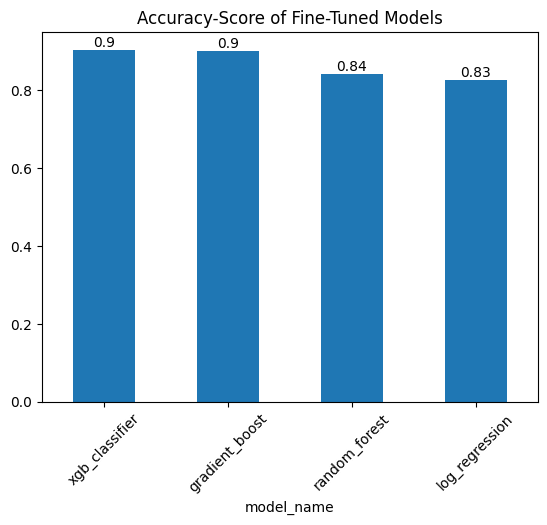

In [ ]:
tuned_metrics_df.set_index("model_name",inplace=True)
bar = tuned_metrics_df["accuracy"].plot(kind="bar")
# add data labels
for i,v in enumerate(tuned_metrics_df["accuracy"]):
    bar.text(i,v, str(round(v,2)), ha="center", va="bottom")
plt.title("Accuracy-Score of Fine-Tuned Models")
plt.xticks(rotation = 45)
plt.show()

#### HYPERPARAMETER PROCESS VISUALIZATION
We can also visualize the optimization process using Optuna's built-in visualization functions. These functions use Plotly to create interactive plots that show various aspects of the optimization process

In [ ]:
# Plot Hyperparameter visualization
ov.plot_optimization_history(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19],
              'y': [0.8849009467875846, 0.8441733082279363, 0.8963105794650986,
                    0.8279327779717418, 0.8441733082279363, 0.8963105794650986,
                    0.8279327779717418, 0.8849009467875846, 0.9027435478850601,
                    0.8279327779717418, 0.9027435478850601, 0.9027435478850601,
                    0.9027435478850601, 0.9027435478850601, 0.9027435478850601,
                    0.8849009467875846, 0.9027435478850601, 0.8963105794650986,
                    0.8975659434076293, 0.8849009467875846]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19],
              'y': [0.8849009467875846, 0.8849009467875846, 0.8963105794650986,
                    0.8963105794650986, 0.8963105794650986, 0.8963105794650986,
                    0.8963105794650986, 0.8963105794650986, 0.9027435478850601,
                    0.9027435478850601, 0.9027435478850601, 0.9027435478850601,
                    0.9027435478850601, 0.9027435478850601, 0.9027435478850601,
                    0.9027435478850601, 0.9027435478850601, 0.9027435478850601,
                    0.9027435478850601, 0.9027435478850601]},
             {'marker': {'color': '#cccccc'},
              'mode': 'markers',
              'name': 'Infeasible Trial',
              'showlegend': False,
              'type': 'scatter',
              'x': [],
              'y': []}],
    'layout': {'template': '...',
               'title': {'text': 'Optimization History Plot'},
               'xaxis': {'title': {'text': 'Trial'}},
               'yaxis': {'title': {'text': 'Objective Value'}}}
})

#### Plotting The Confusion Matrix

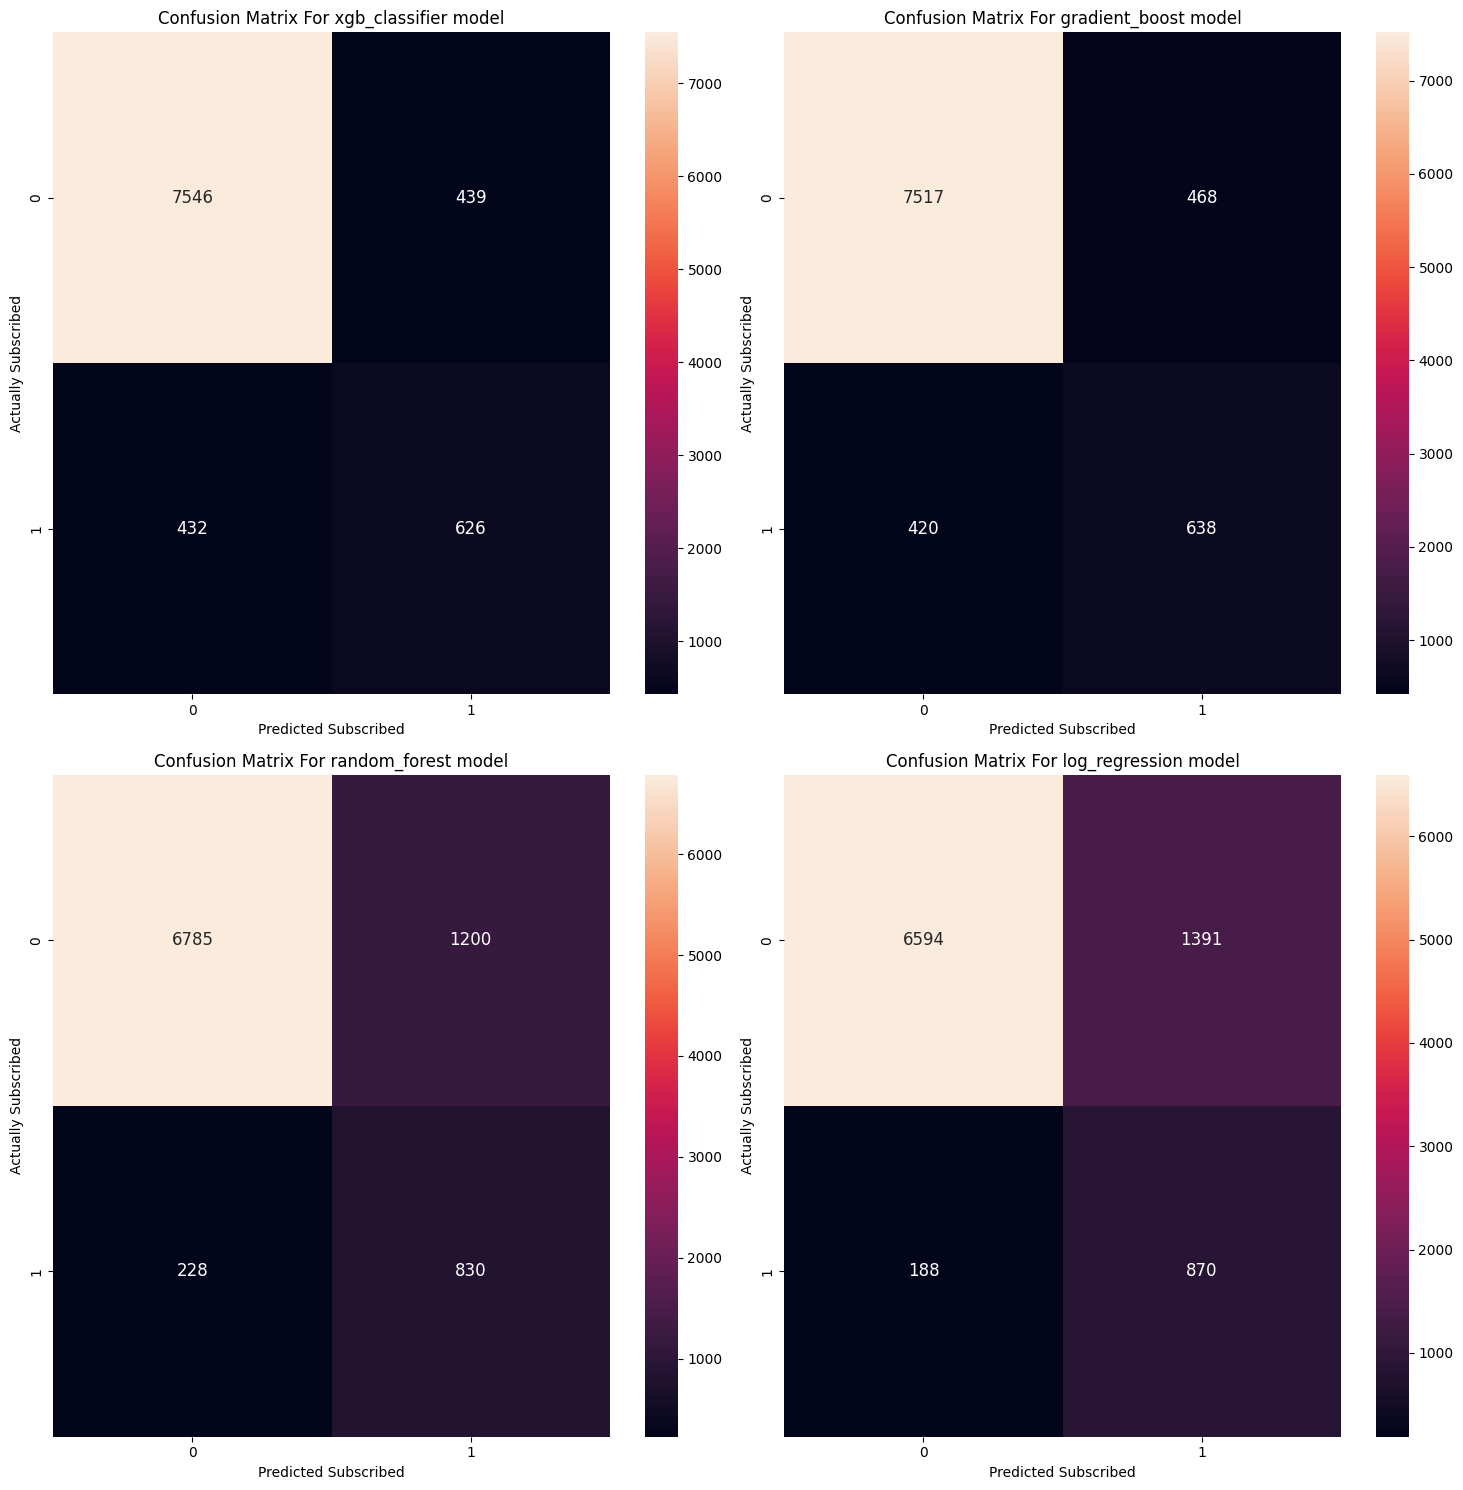

In [ ]:
# Convert the confusion matrices from lists to numpy arrays for easier visualization
tuned_metrics_df['confusion_matrix'] = tuned_metrics_df['confusion_matrix'].apply(lambda x: np.array(x))

# Create subplots
fig,axes = plt.subplots(nrows=2,ncols=2,figsize = (15,15))
fig.tight_layout()

# Flatten the axes array for easy iteration
axes = axes.flatten() 

for i,(model_name,row) in enumerate(tuned_metrics_df.iterrows()):
    conf_matrix = row["confusion_matrix"]
    sns.heatmap(conf_matrix,annot=True,fmt="d", annot_kws={"size":12},ax=axes[i])
    axes[i].set_title(f"Confusion Matrix For {model_name} model")
    axes[i].set_xlabel("Predicted Subscribed")
    axes[i].set_ylabel("Actually Subscribed")

# Display the plot
plt.tight_layout()
plt.show()

Interpretation of Confusion Matrix

Positive class(yes) = 1  Negative Class(No) = 0

- TP: Represents a section of the customers that the ML algorithm predicted them to subscribe to a deposit tern and they actually subscribed.
- FP: Represents a section of the customers where the ML model predicted them to have subsrcibed to a deposit term but they actually didn't.
- FN: Represents the section of customers where the ML model predicted them not to subscribe to a deposit term but they did.
- TN: Section of the patients where the ML model predicted them Not to subscribe to a deposit term and the actually didn't.

#### Visualize Evaluation Using ROC-AUC


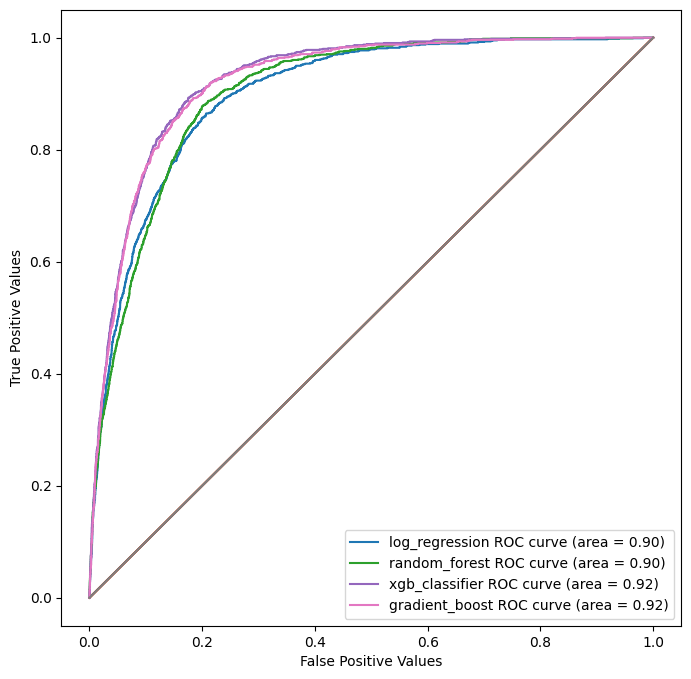

In [ ]:
roc_data = {}

# set subplots
fig,axes = plt.subplots(figsize=(8,8))

# Loop through all models and pipelines
for model_name, pipeline in balanced_pipelines.items():
    # get the predicted probability of each model and store in predict_proba variable
    ypredict_proba = pipeline.predict_proba(X_test)[:,1]
    # Unpack all roc curve variables
    fpr,tpr,threshold = roc_curve(y_test_encoded,ypredict_proba)
    # compute AUC
    roc_auc = auc(fpr,tpr)
    # add auc to the roc_data dictionary
    roc_auc_df = pd.DataFrame({"False Positive Rate":fpr,"True Positive Rate":tpr,"Threshold":threshold})
    roc_data[model_name] = roc_auc_df
    # plot the roc curve
    axes.plot(fpr,tpr, label=f"{model_name} ROC curve (area = {roc_auc:.2f})")
    # axes.plot(fpr, tpr, label=f"{model_name} ROC curve (area = {roc_auc:.2f})")
    axes.plot([0,1],[0,1])
    axes.set_xlabel("False Positive Values")
    axes.set_ylabel("True Positive Values")

# Show visualization with legend
plt.legend()
plt.show()

#### Project Impact Analysis
The main objective of this project is to be able to improve upon Recall/Sensitivity(the proportion of customers the model correctly predicted to subscribe to a deposit term so our marketting team will keep an eye on them).
The project focus is on the Positive Class, how our model is performing on predicting customers who will subscribe to our deposit term.

#### Persist Model

In [ ]:
# save the top two performing models
gradient_boost_pipeline = balanced_pipelines["gradient_boost"]
xgb_classifier_pipeline = balanced_pipelines["xgb_classifier"]

#### Feature Importance - XGB Classifier

<Figure size 2000x2000 with 0 Axes>

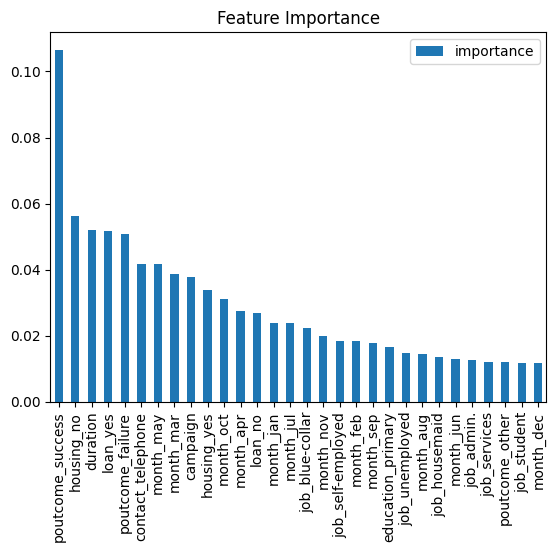

In [ ]:
# Extract feature importances
feature_importance = xgb_classifier_pipeline.named_steps['classifier'].feature_importances_

# Convert the csr_matrix to a dense array
preprocessed_X_train = xgb_classifier_pipeline[:-1].transform(X_train)

# Get feature names from the ColumnTransformer
try:
    num_feature_names = numerical_features  # Get original numerical features before applying pipeline
    cat_feature_names = xgb_classifier_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['cat_encoder'].get_feature_names_out(categorical_features) 
    preprocessed_feature_names = np.concatenate([num_feature_names, cat_feature_names])
except AttributeError:
    preprocessed_feature_names = X_train.columns  # Fall back to original feature names if there's an issue

# Ensure the length of feature_importance matches the feature names
if len(feature_importance) == len(preprocessed_feature_names):
    feat_df = pd.DataFrame(feature_importance, index = preprocessed_feature_names, columns=["importance"])
else:
    print(f"Mismatch: {len(feature_importance)} importances vs {len(preprocessed_feature_names)} features")

# Plot the top 10 most important features
plt.figure(figsize=(20,20))
feat_df.sort_values("importance", ascending=False).head(30).plot(kind="bar", title="Feature Importance")
plt.show()

#### Feature Importance - Gradient Boosting Algorithm

<Figure size 2000x2000 with 0 Axes>

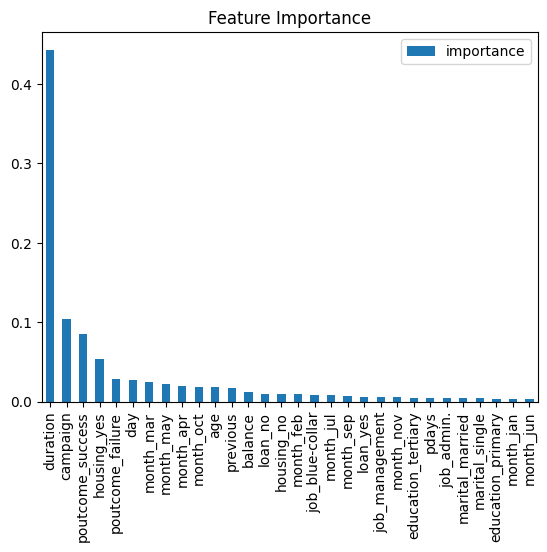

In [ ]:
# Extract feature importances
feature_importance = gradient_boost_pipeline.named_steps['classifier'].feature_importances_

# Convert the csr_matrix to a dense array
preprocessed_X_train = gradient_boost_pipeline[:-1].transform(X_train)

# Get feature names from the ColumnTransformer
try:
    num_feature_names = numerical_features  # Get original numerical features before applying pipeline
    cat_feature_names = gradient_boost_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['cat_encoder'].get_feature_names_out(categorical_features) 
    preprocessed_feature_names = np.concatenate([num_feature_names, cat_feature_names])
except AttributeError:
    preprocessed_feature_names = X_train.columns  # Fall back to original feature names if there's an issue

# Ensure the length of feature_importance matches the feature names
if len(feature_importance) == len(preprocessed_feature_names):
    feat_df = pd.DataFrame(feature_importance, index = preprocessed_feature_names, columns=["importance"])
else:
    print(f"Mismatch: {len(feature_importance)} importances vs {len(preprocessed_feature_names)} features")

# Plot the top 10 most important features
plt.figure(figsize=(20,20))
feat_df.sort_values("importance", ascending=False).head(30).plot(kind="bar", title="Feature Importance")
plt.show()

#### Prediction On Test Data

In [ ]:
# Load Test Data
test_df = pd.read_csv("../data/bank.csv", delimiter=";")
# preview data
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# Check info about data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
X_test = test_df.copy()
# Check for Nulls
X_test.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# Handle Unknown values
X_test = handle_unknown_values(X_test)

In [ ]:
# Predict the labels on the preprocessed test data using the trained model
y_predict_with_best_model = xgb_classifier_pipeline.predict(X_test)

# Create a DataFrame to store the predicted results
predicted_result = pd.DataFrame({'y': np.where(y_predict_with_best_model == 1, 'yes', 'no')})

# Display the count of predicted outcomes
subscription_counts = predicted_result['y'].value_counts()
print(subscription_counts)

y
no     3977
yes     544
Name: count, dtype: int64


In [ ]:
predicted_result

,y
0,no
1,no
2,no
3,no
4,no
...,...
4516,no
4517,no
4518,no
4519,no


#### Persist the Model

In [ ]:
model_components = {
    "encoder":encoder,
    "xgb_classifier":xgb_classifier_pipeline,
    "gradient_boost":gradient_boost_pipeline
    }

In [ ]:
# Define the path for saving model
model_dir = "../api/models"
# Create models dir if it does not exists
os.makedirs(model_dir,exist_ok=True)

In [ ]:
# Define the full path for the joblib file
components_path = os.path.join(model_dir,"model_components.joblib")

In [ ]:
with open(components_path,'wb') as file:
    joblib.dump(model_components, file)

PicklingError: Can't pickle <function safe_log1p at 0x000001A8E595C680>: it's not the same object as __main__.safe_log1p